In [1]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [2]:
from scipy import stats

In [3]:
import numpy as np
import math

In [4]:
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore") 
%matplotlib inline 
%config InlineBackend.figure_format='retina' #선명도 해결
import matplotlib as mpl 
# 폰트 변환 
# Windows
mpl.rc("font", family='Malgun Gothic')


df = pd.read_csv('/content/Mydrive/MyDrive/codestates/vgdata.csv')

In [5]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
df.shape

(16598, 10)

In [7]:
idx = df[df['Genre'] == 'Party'].index
df.drop(index=idx, inplace = True)

In [8]:
df.drop(columns=['Unnamed: 0'], axis = 1,inplace = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [9]:
df.isna().sum()

Name            0
Platform        0
Year            1
Genre           0
Publisher      32
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     2
dtype: int64

In [10]:
na_index = df['Other_Sales'][df['Other_Sales'].isnull()].index

In [11]:
df.loc[na_index] # 데이터 밀림

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7596,"B's-LOG Party??,PSP""",2010,Adventure,Idea Factory,0,0,0.04,0,NaN
16191,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,Adventure,Sony Computer Entertainment,0,0,0.08,0,NaN


In [12]:
df['Name'] = (df['Name'].apply(lambda x: x.replace('??',''))).apply(lambda x: x.replace('\"',''))

In [13]:
l1 = list(df.loc[7596].values)
l2 = list(df.loc[16191].values)

In [14]:
df.loc[7596] = l1[0].split(',') + l1[1:-1]
df.loc[16191] = l2[0].split(',') + l2[1:-1]

In [15]:
df.isna().sum()

Name            0
Platform        0
Year            1
Genre           0
Publisher      32
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [16]:
df.dropna(axis = 0, inplace = True)
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [17]:
df.shape

(16564, 9)

In [18]:
df.dtypes

Name           object
Platform       object
Year           object
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

In [19]:
Sales_list = df.columns[5:]

In [20]:
def myFunc(val):
  if (val // 10) > 0:
    result = val * 1000
  else:
    result = val * math.pow(10, 6)
  
  return result

In [21]:
for i in Sales_list:
  df[i] = ((df[i].str.replace('K', "")).str.replace('M', "")).apply(pd.to_numeric)
  df[i] = (df[i].apply(myFunc)).astype('int')


In [22]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000


In [23]:
df2 = df.copy()

In [24]:
df2['Year'] = df2['Year'].apply(pd.to_numeric)

In [25]:
df2.reset_index(drop = True, inplace = True)#df2[df2['Year'] < '1900'].index

In [26]:
year_ = df2[df2['Year'] < 1900].index

In [27]:
df2.iloc[year_]#['Year']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,10000,120000,0,30000
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,100000,70000,0,10000
213,NASCAR Unleashed,PS3,11,Racing,Activision,90000,0,0,10000
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,20000,0,0
768,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,530000,410000,0,140000
...,...,...,...,...,...,...,...,...,...
15952,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,20000,0
16069,Fab 5 Soccer,DS,8,Sports,Destineer,10000,0,0,0
16115,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,240000,180000,30000,50000
16360,Point Blank 3,PS,0,Shooter,Namco Bandai Games,10000,10000,0,0


In [28]:
df2.iloc[year_]['Year'].value_counts()

9     10
11    10
8     10
6      7
10     7
3      7
16     5
15     5
5      4
4      4
95     4
0      3
2      3
96     3
7      3
98     3
14     2
97     2
13     2
1      2
12     2
86     1
94     1
Name: Year, dtype: int64

In [29]:
df2['Year'] = df2['Year'].apply(lambda x: 2000+x if ((len(str(x)) == 2) | (len(str(x)) == 1)) & (x < 20) else (1900+x if (len(str(x)) == 2) & (x > 20) else 0+x))
#길이 = 2 '20xx' 길이 = 1 '200x' 로 변경

# xx이면서 20보다 작음

In [30]:
df2['Year'].value_counts()

2008    1453
2009    1453
2010    1283
2007    1216
2011    1177
2006    1029
2005     951
2002     852
2003     788
2004     761
2012     663
2015     616
2014     581
2013     550
2001     489
1998     381
2000     354
2016     343
1999     341
1997     291
1996     264
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      37
1986      21
1989      18
1983      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980      13
1978       7
2017       3
1977       3
2018       2
2020       1
1979       1
Name: Year, dtype: int64

In [31]:
df2.sort_values(by = 'Year', ignore_index= True, inplace= True)

In [32]:
#1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
#2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
#3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [33]:
df2['Tot_Sales'] = df2.select_dtypes(include='int').iloc[:,[1,2,3,4]].sum(axis = 1)

In [34]:
#판매량 카테고리변수 설정 1:매우나쁨 / 2:나쁨 / 3: 보통 / 4: 좋음 / 5: 매우좋음
df2['NA_Sales_score'] = pd.cut(df2['NA_Sales'],
       bins = 5,
       labels = [1,2,3,4,5])

df2['EU_Sales_score'] = pd.cut(df2['EU_Sales'],
       bins = 5,
       labels = [1,2,3,4,5])

df2['JP_Sales_score'] = pd.cut(df2['JP_Sales'],
       bins = 5,
       labels = [1,2,3,4,5])

df2['Other_Sales_score'] = pd.cut(df2['Other_Sales'],
       bins = 5,
       labels = [1,2,3,4,5])

In [35]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score
0,Indy 500,2600,1977,Racing,Atari,260000,10000,0,0,270000,1,1,1,1
1,Combat,2600,1977,Action,Atari,1170000,70000,0,10000,1250000,1,1,1,1
2,Air-Sea Battle,2600,1977,Shooter,Atari,910000,60000,0,10000,980000,1,1,1,1
3,Space Invaders,2600,1978,Shooter,Atari,2360000,140000,0,30000,2530000,2,1,1,1
4,Maze Craze: A Game of Cops 'n Robbers,2600,1978,Action,Atari,420000,20000,0,0,440000,1,1,1,1


In [36]:
gen_names = df2['Genre'].value_counts().index
gen_values = df2['Genre'].value_counts().values


In [37]:
#1. 지역에 따라서 선호하는 게임 장르가 다를까?

''' 가설설정 : 장르별로 지역에 따라 판매량(선호도)이 다르다.
  - h0(귀무가설) : 지역에 따른 판매량(선호도)는 모두 동일하다.
  - h1(대립가설) : 지역에 따른 판매량(선호도)는 모두 동일하지 않다.(적어도 2개 지역의 판매량은 차이가 있다.)

'''
#각 장르별 p-val 확인

' 가설설정 : 장르별로 지역에 따라 판매량(선호도)이 다르다.\n  - h0(귀무가설) : 지역에 따른 판매량(선호도)는 모두 동일하다.\n  - h1(대립가설) : 지역에 따른 판매량(선호도)는 모두 동일하지 않다.(적어도 2개 지역의 판매량은 차이가 있다.)\n\n'

In [38]:
ddf = df2[['Genre', 'NA_Sales_score', 'EU_Sales_score', 'JP_Sales_score', 'Other_Sales_score']]

In [39]:
Genre_groups = ddf.groupby('Genre')

In [40]:
dict_df = dict(list(Genre_groups))

In [41]:
key = list(dict_df.keys())
key

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [42]:
temp_list = []
for cnt, genre in enumerate(key) :

  t_df = dict_df[genre].drop('Genre', axis = 1)

  f, p_val = stats.f_oneway(t_df['NA_Sales_score'], t_df['EU_Sales_score'], 
                            t_df['JP_Sales_score'], t_df['Other_Sales_score']) #장르별 anova분석 시행
  if p_val < .05:
    temp_list.append(genre)
  print(cnt+1, '....')
  print("p-value of", genre,'=', round(p_val,2))
  print()

1 ....
p-value of Action = 0.0

2 ....
p-value of Adventure = 0.22

3 ....
p-value of Fighting = 0.0

4 ....
p-value of Misc = 0.0

5 ....
p-value of Platform = 0.0

6 ....
p-value of Puzzle = 0.11

7 ....
p-value of Racing = 0.0

8 ....
p-value of Role-Playing = 0.0

9 ....
p-value of Shooter = 0.0

10 ....
p-value of Simulation = 0.29

11 ....
p-value of Sports = 0.0

12 ....
p-value of Strategy = 0.07



In [43]:
temp_list#대립가설채택 p<0.05

['Action',
 'Fighting',
 'Misc',
 'Platform',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Sports']

In [44]:
# ans) 
'''['Action',
 'Fighting',
 'Misc',
 'Platform',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Sports']
 '''#의 장르는 지역별 차이가 있었고.

'''['Strategy', 'Party', 'Simulation', 'Puzzle', 'Adventure']  #list(set(ddf['Genre'].unique()) - set(temp_list))
'''#귀무가설을 기각한 5개의 장르는 차이가 없다.
 #따라서, 13개 중 7개는 차이를 보였으며 지역별 장르 선호도는 차이가 있다라고 판단하였음.

"['Strategy', 'Party', 'Simulation', 'Puzzle', 'Adventure']  #list(set(ddf['Genre'].unique()) - set(temp_list))\n"

In [45]:
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score
0,Indy 500,2600,1977,Racing,Atari,260000,10000,0,0,270000,1,1,1,1
1,Combat,2600,1977,Action,Atari,1170000,70000,0,10000,1250000,1,1,1,1
2,Air-Sea Battle,2600,1977,Shooter,Atari,910000,60000,0,10000,980000,1,1,1,1
3,Space Invaders,2600,1978,Shooter,Atari,2360000,140000,0,30000,2530000,2,1,1,1
4,Maze Craze: A Game of Cops 'n Robbers,2600,1978,Action,Atari,420000,20000,0,0,440000,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16559,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10000,0,10000,1,1,1,1
16560,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,30000,0,30000,1,1,1,1
16561,RollerCoaster Tycoon,PC,2018,Strategy,Microprose,20000,20000,0,10000,50000,1,1,1,1
16562,Drake of the 99 Dragons,XB,2018,Shooter,Majesco Entertainment,50000,10000,0,0,60000,1,1,1,1


In [46]:
print("플랫폼 종류 = ", df2['Platform'].unique())
print()
print("플랫폼 수 = ",len(df2['Platform'].unique()))

플랫폼 종류 =  ['2600' 'NES' 'DS' 'PC' 'GB' 'SNES' 'GEN' 'GG' 'SCD' 'NG' 'SAT' 'PS' '3DO'
 'TG16' 'N64' 'GBA' 'PCFX' 'DC' 'Wii' 'WS' 'PS2' 'GC' 'XB' 'X360' 'PSP'
 'PS3' 'PSV' '3DS' 'WiiU' 'PS4' 'XOne']

플랫폼 수 =  31


In [47]:
print("연도 = ", df2['Year'].unique()) # 1977 ~ 2020
print()
print("연도 수 = ",len(df2['Year'].unique()))

연도 =  [1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2020]

연도 수 =  43


In [48]:
print("장르 = ", df2['Genre'].unique()) # 
print()
print("장르 수 = ",len(df2['Genre'].unique()))

장르 =  ['Racing' 'Action' 'Shooter' 'Puzzle' 'Sports' 'Fighting' 'Adventure'
 'Misc' 'Platform' 'Simulation' 'Role-Playing' 'Strategy']

장르 수 =  12


In [49]:
print("출판 = ", df2['Publisher'].unique()[1:20]) # 
print()
print("출판 수 = ",len(df2['Publisher'].unique())-1)

출판 =  ['Sears' 'Activision' '20th Century Fox Video Games' 'Unknown'
 'Mattel Interactive' 'Imagic' 'Coleco' 'Parker Bros.' 'Starpath Corp.'
 'Taito' 'Data Age' 'Tigervision' 'Mystique' 'Men-A-Vision' 'Ultravision'
 'CBS Electronics' 'Sega' 'Answer Software' 'Universal Gamex']

출판 수 =  590


In [50]:
region4_col = df2.columns[5:-1]

Text(0.5, 1.0, 'Tot_Sales(Genre)')

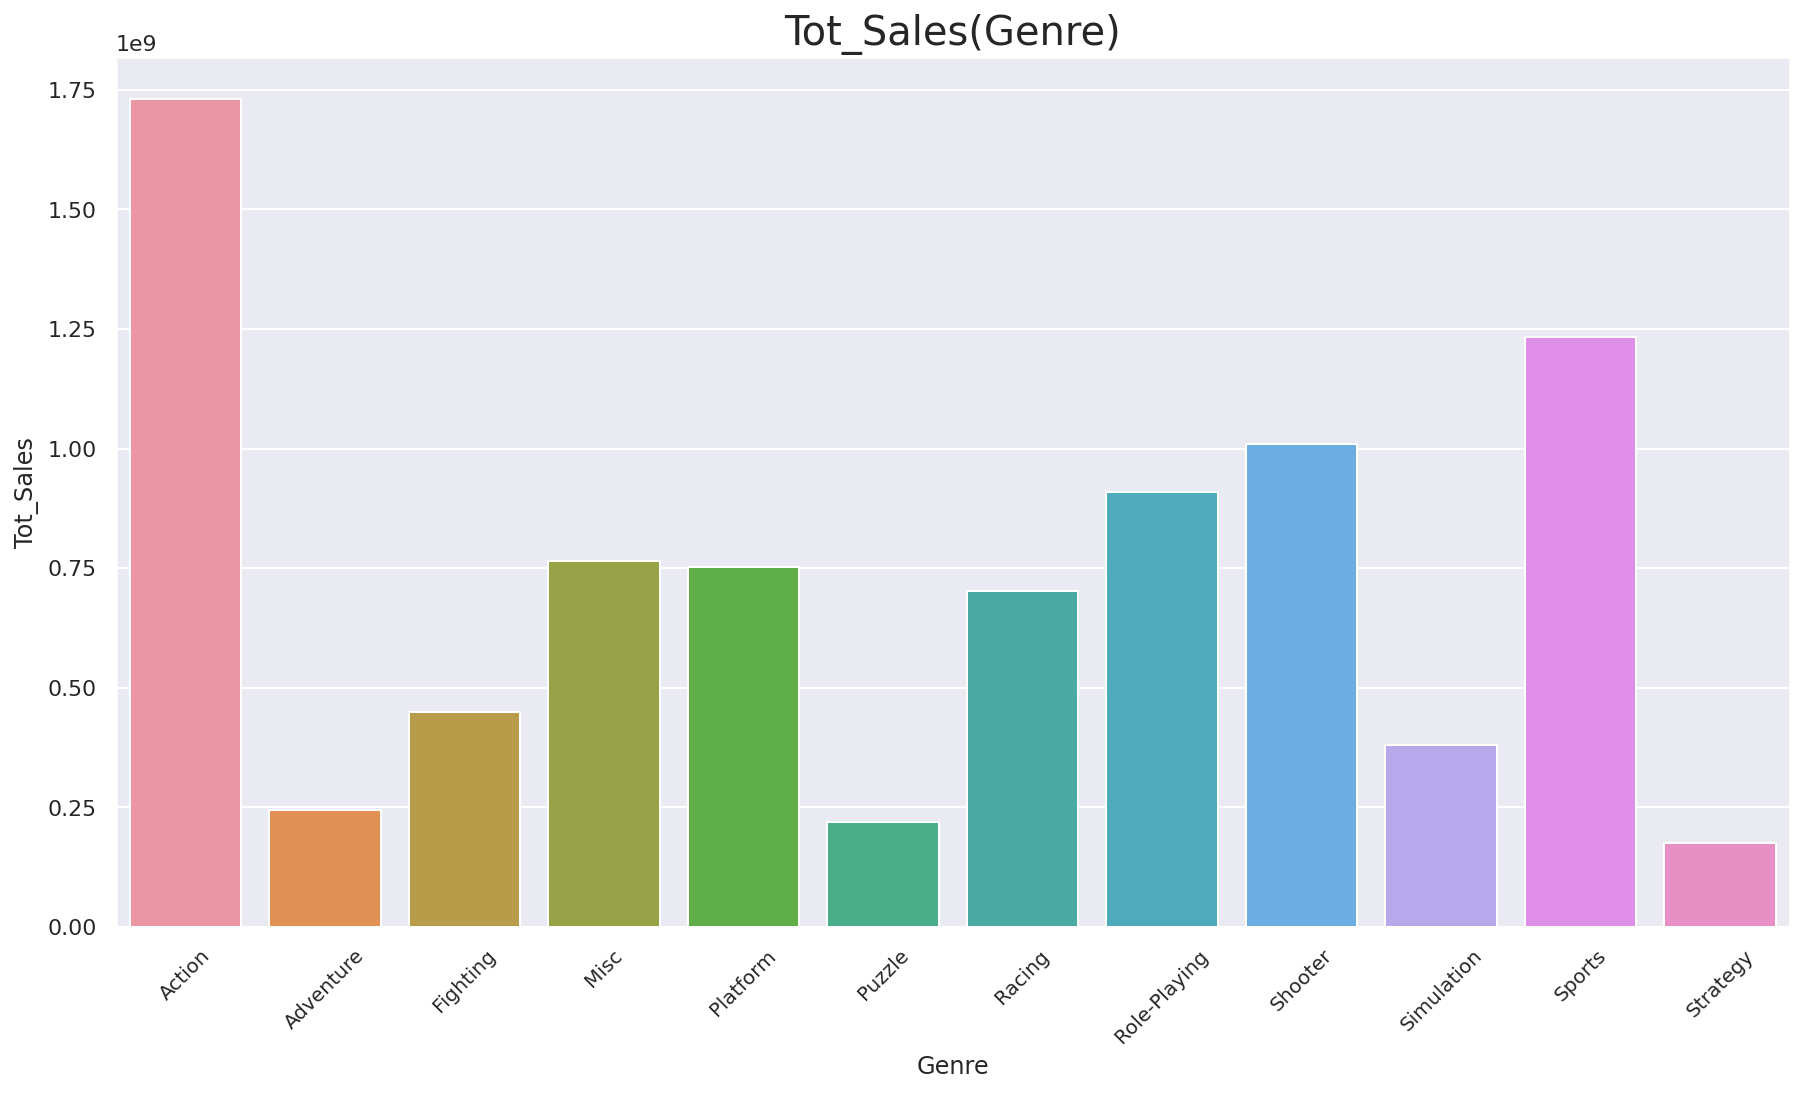

In [51]:
df2_tot = df2.groupby('Genre')['Tot_Sales'].agg('sum').reset_index()

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='Genre', y='Tot_Sales', data=df2_tot)#, hue = 'Genre')


plt.xticks(fontsize = 10, rotation = 45)
plt.title('Tot_Sales(Genre)', fontsize='20')
# plt.legend(fontsize = 9,df2['Genre'])

In [52]:
df2_genre = df2.groupby('Genre')[region4_col].agg('mean').round(2).reset_index()
df2_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales
0,Action,264708.02,158012.10,47760.97,53392.00,523873.09
1,Adventure,83217.05,50868.22,41682.17,13310.08,189077.52
2,Fighting,263667.45,119481.13,103007.08,43254.72,529410.38
3,Misc,218395.92,122851.31,61381.92,43119.53,445748.69
4,Platform,416717.94,228054.30,147929.86,58348.42,851050.52
5,Puzzle,172914.28,87297.76,97969.02,21583.48,379764.54
6,Racing,275325.20,180699.42,45424.68,61915.06,563364.36
7,Role-Playing,213143.90,127152.45,229926.27,40423.10,610645.73
8,Shooter,424196.13,239137.40,29221.37,78389.31,770944.22
9,Simulation,211707.03,117971.16,73494.81,36378.32,439551.32


In [53]:
df2[df2['Genre'] == 'Party']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score


In [54]:
range(len(df2_genre))

range(0, 12)

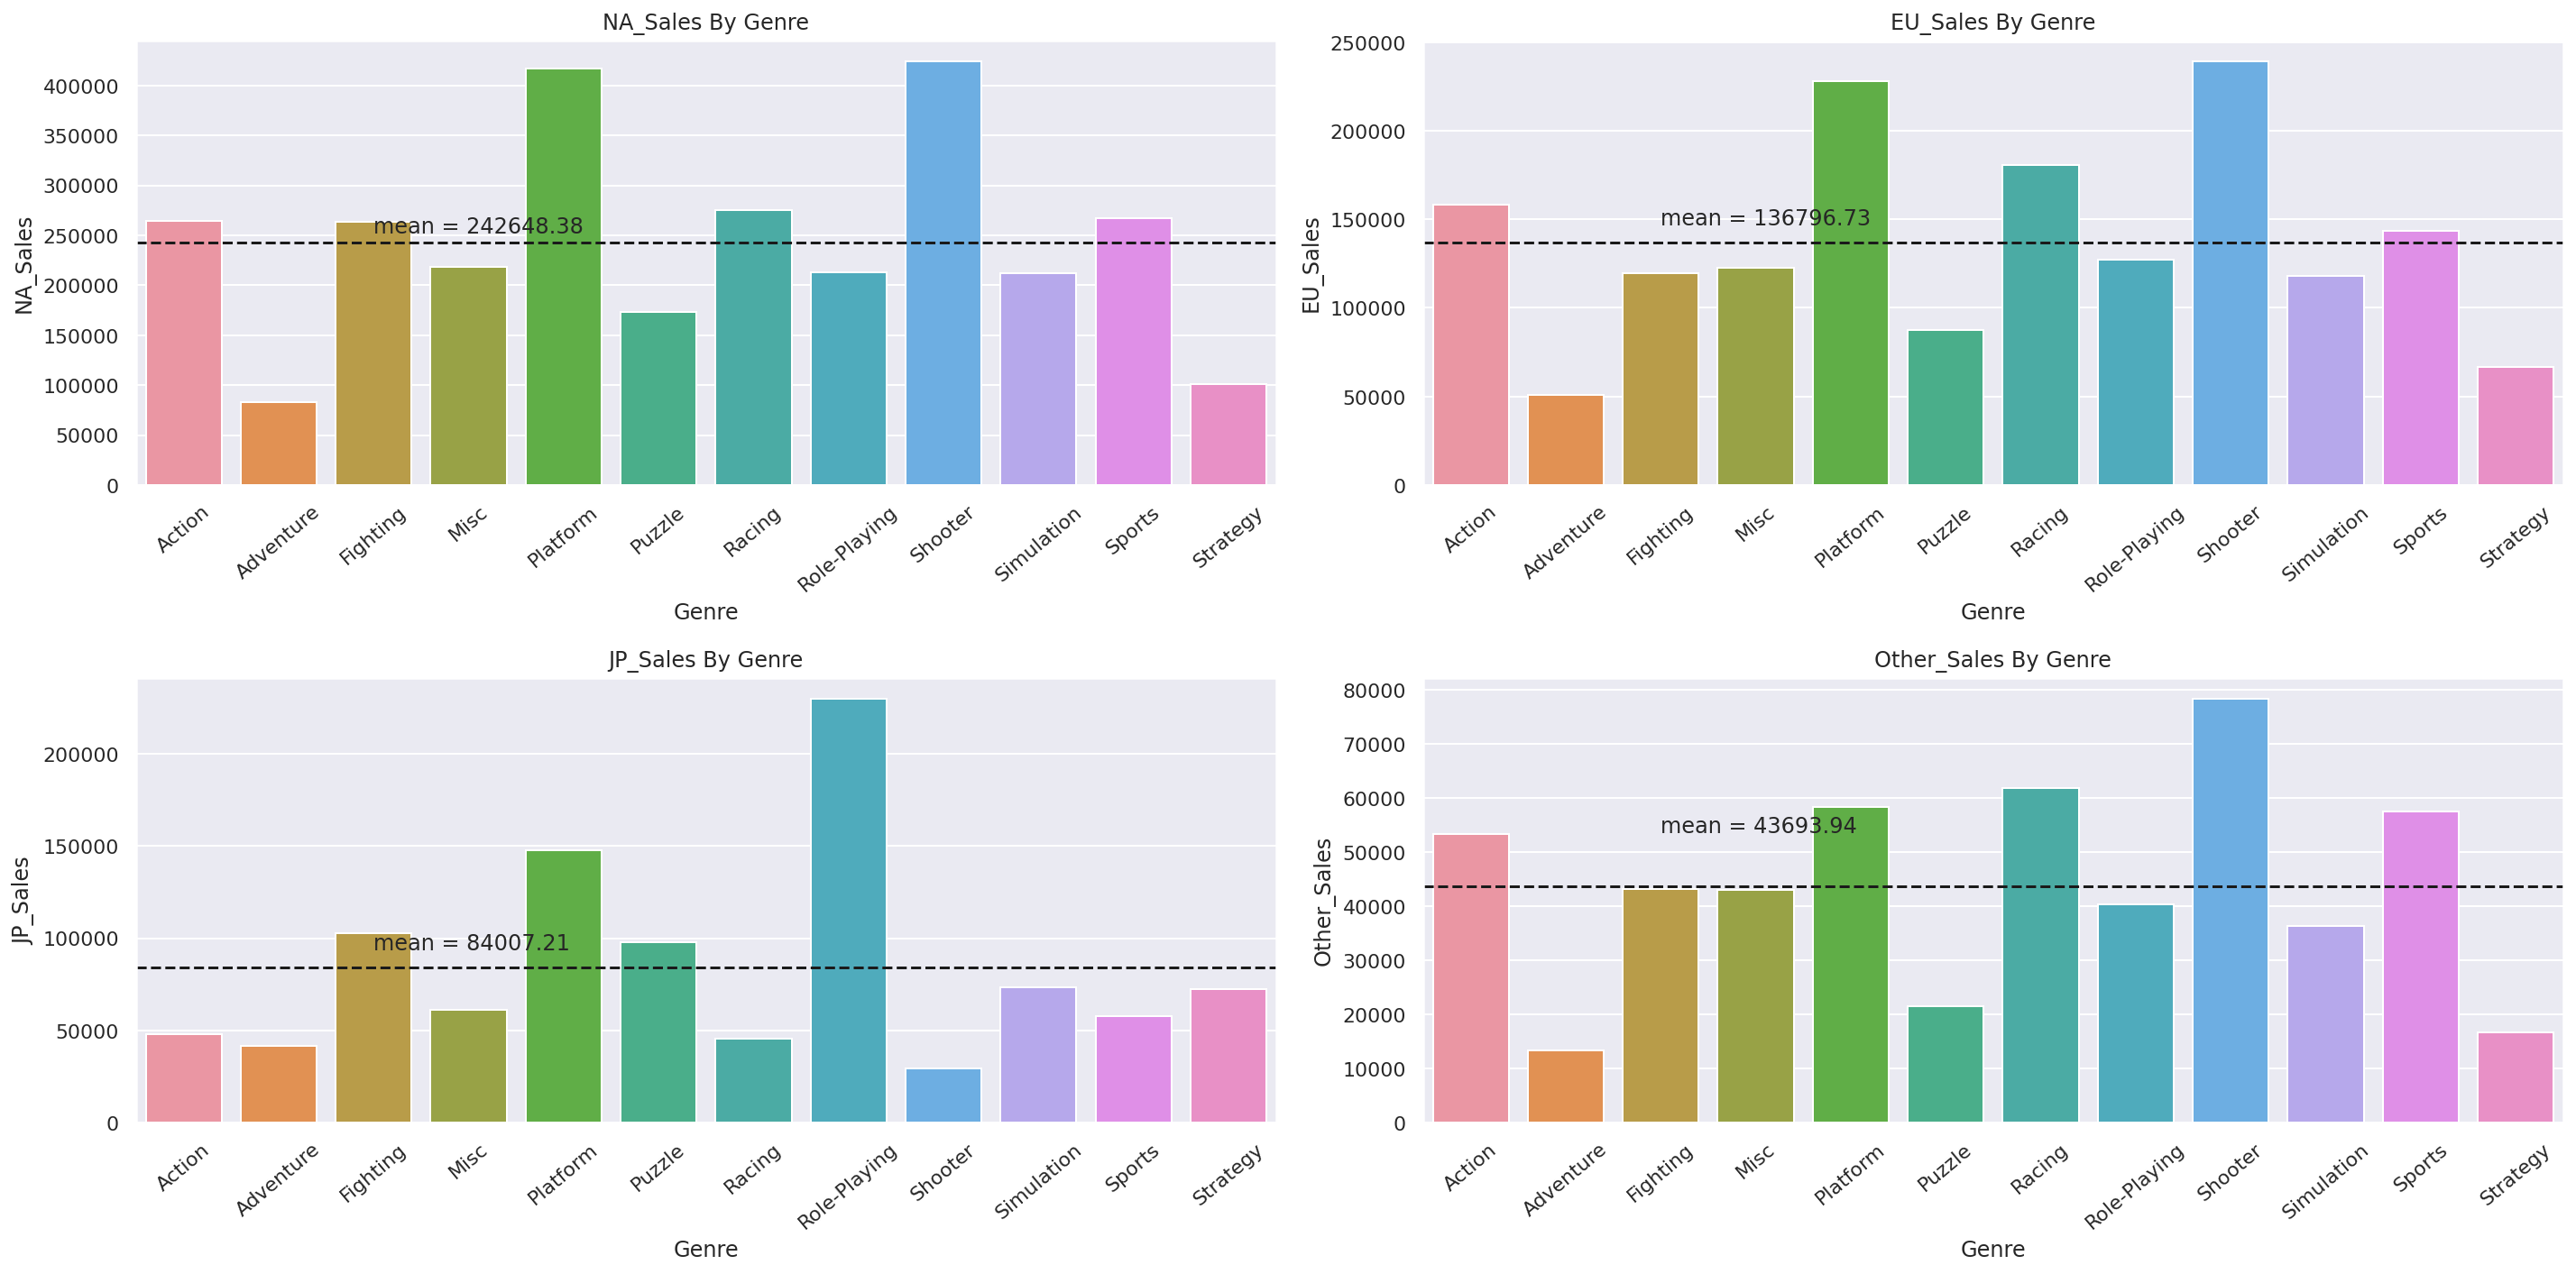

In [55]:
sns.set(rc = {'figure.figsize':(20,10)})
# NA_Sales EU_Sales	JP_Sales	Other_Sales
##
plt.subplot(221)
sns.barplot(x='Genre', y='NA_Sales', data=df2_genre)#, hue = 'Genre')
plt.axhline(df2_genre['NA_Sales'].mean(), linestyle='--', color='k')

na_mean = df2_genre['NA_Sales'].mean()
plt.text(x = 2, y = na_mean+10000, s = 'mean = '+str(round(na_mean,2)))
plt.title('NA_Sales By Genre')
plt.xticks(rotation = 40)

##
#na_mean = df2_genre['EU_Sales'].mean()
plt.subplot(222)
sns.barplot(x='Genre', y='EU_Sales', data=df2_genre)#, hue = 'Genre')
plt.axhline(df2_genre['EU_Sales'].mean(), linestyle='--', color='k')

na_mean = df2_genre['EU_Sales'].mean()
plt.text(x = 2, y = na_mean+10000, s = 'mean = '+str(round(na_mean,2)))
plt.title('EU_Sales By Genre')
plt.xticks(rotation = 40)

##
plt.subplot(223)
sns.barplot(x='Genre', y='JP_Sales', data=df2_genre)#, hue = 'Genre')
plt.axhline(df2_genre['JP_Sales'].mean(), linestyle='--', color='k')

na_mean = df2_genre['JP_Sales'].mean()
plt.text(x = 2, y = na_mean+10000, s = 'mean = '+str(round(na_mean,2)))
plt.title('JP_Sales By Genre')
plt.xticks(rotation = 40)


##
plt.subplot(224)
sns.barplot(x='Genre', y='Other_Sales', data=df2_genre)#, hue = 'Genre')
plt.axhline(df2_genre['Other_Sales'].mean(), linestyle='--', color='k')

na_mean = df2_genre['Other_Sales'].mean()
plt.text(x = 2, y = na_mean+10000, s = 'mean = '+str(round(na_mean,2)))
plt.title('Other_Sales By Genre')
plt.xticks(rotation = 40)

plt.tight_layout()

In [56]:
year_list = ['76-80(19'')', '81-85', '86-90', '91-95', '96-00(20'')',
             '01-05', '06-10', '11-15', '16-20']
df2['Year_bin'] = pd.cut((df2['Year']), 
       bins = len(year_list),
       labels = year_list)

In [57]:
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score,Year_bin
0,Indy 500,2600,1977,Racing,Atari,260000,10000,0,0,270000,1,1,1,1,76-80(19)
1,Combat,2600,1977,Action,Atari,1170000,70000,0,10000,1250000,1,1,1,1,76-80(19)
2,Air-Sea Battle,2600,1977,Shooter,Atari,910000,60000,0,10000,980000,1,1,1,1,76-80(19)
3,Space Invaders,2600,1978,Shooter,Atari,2360000,140000,0,30000,2530000,2,1,1,1,76-80(19)
4,Maze Craze: A Game of Cops 'n Robbers,2600,1978,Action,Atari,420000,20000,0,0,440000,1,1,1,1,76-80(19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16559,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10000,0,10000,1,1,1,1,16-20
16560,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,30000,0,30000,1,1,1,1,16-20
16561,RollerCoaster Tycoon,PC,2018,Strategy,Microprose,20000,20000,0,10000,50000,1,1,1,1,16-20
16562,Drake of the 99 Dragons,XB,2018,Shooter,Majesco Entertainment,50000,10000,0,0,60000,1,1,1,1,16-20


In [58]:
df_cnt = df2.groupby(['Year_bin','Genre'])['Name'].agg('count').reset_index()

In [59]:
df_cnt2 = df_cnt.sort_values(by = ['Year_bin', 'Name'], ascending = [True, False])
df_cnt2 

,Year_bin,Genre,Name
0,76-80(19),Action,31
8,76-80(19),Shooter,14
10,76-80(19),Sports,7
5,76-80(19),Puzzle,5
3,76-80(19),Misc,4
...,...,...,...
98,16-20,Fighting,14
107,16-20,Strategy,12
100,16-20,Platform,10
105,16-20,Simulation,10


In [60]:
df_cnt['Genre'].unique() #13

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [61]:
len(df_cnt['Year_bin']) #13

108

In [62]:
list(np.arange(0,117,13))

[0, 13, 26, 39, 52, 65, 78, 91, 104]

In [63]:
rank_genre = df_cnt2.iloc[np.arange(0,117,13)]

In [64]:
g_names = list(rank_genre['Genre'])

In [65]:
values = list(rank_genre['Name'])

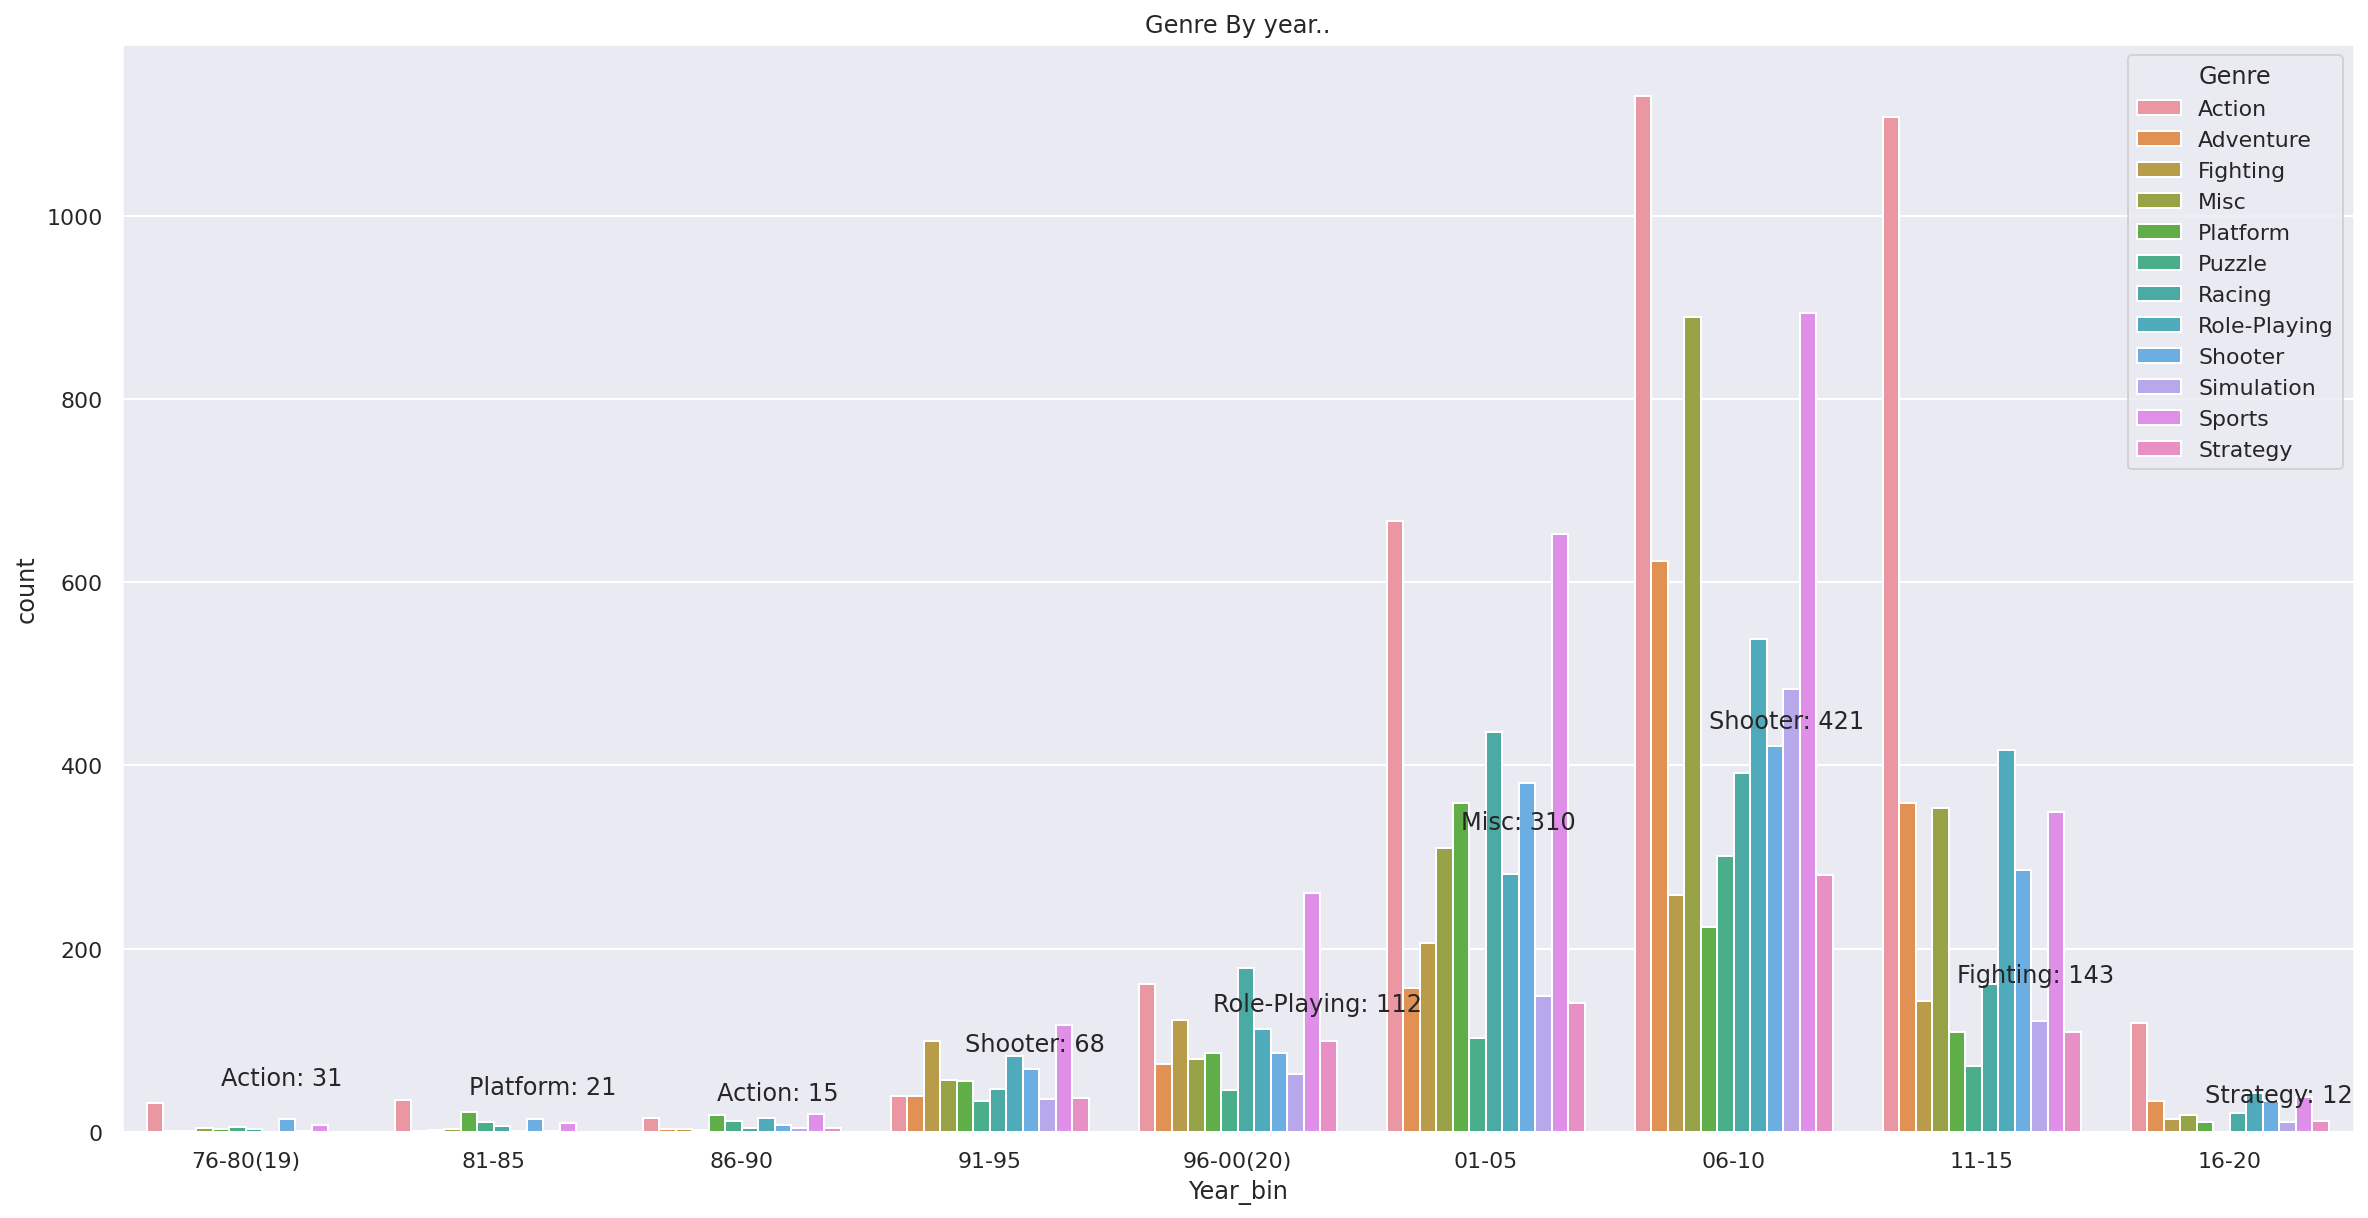

In [66]:
sns.barplot(data = df_cnt, x = 'Year_bin', y = 'Name', hue = 'Genre')

for i in range(len(values)):
  plt.text(i-.1, y = values[i]+20, s = str(g_names[i])+ ": " + str(values[i]))
plt.title('Genre By year..')
plt.ylabel('count');

In [67]:
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score,Year_bin
0,Indy 500,2600,1977,Racing,Atari,260000,10000,0,0,270000,1,1,1,1,76-80(19)
1,Combat,2600,1977,Action,Atari,1170000,70000,0,10000,1250000,1,1,1,1,76-80(19)
2,Air-Sea Battle,2600,1977,Shooter,Atari,910000,60000,0,10000,980000,1,1,1,1,76-80(19)
3,Space Invaders,2600,1978,Shooter,Atari,2360000,140000,0,30000,2530000,2,1,1,1,76-80(19)
4,Maze Craze: A Game of Cops 'n Robbers,2600,1978,Action,Atari,420000,20000,0,0,440000,1,1,1,1,76-80(19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16559,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10000,0,10000,1,1,1,1,16-20
16560,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,30000,0,30000,1,1,1,1,16-20
16561,RollerCoaster Tycoon,PC,2018,Strategy,Microprose,20000,20000,0,10000,50000,1,1,1,1,16-20
16562,Drake of the 99 Dragons,XB,2018,Shooter,Majesco Entertainment,50000,10000,0,0,60000,1,1,1,1,16-20


In [68]:
df2['Tot_Sales'].max()

23430000

In [69]:
df2.loc[df2['Tot_Sales'] == df2['Tot_Sales'].max(), 'Genre']

5596    Racing
Name: Genre, dtype: object

In [70]:
#연도별 평균

d1 = df2.groupby('Year_bin')[Sales_list].sum()

Text(0.5, 1.0, 'Sales By Region')

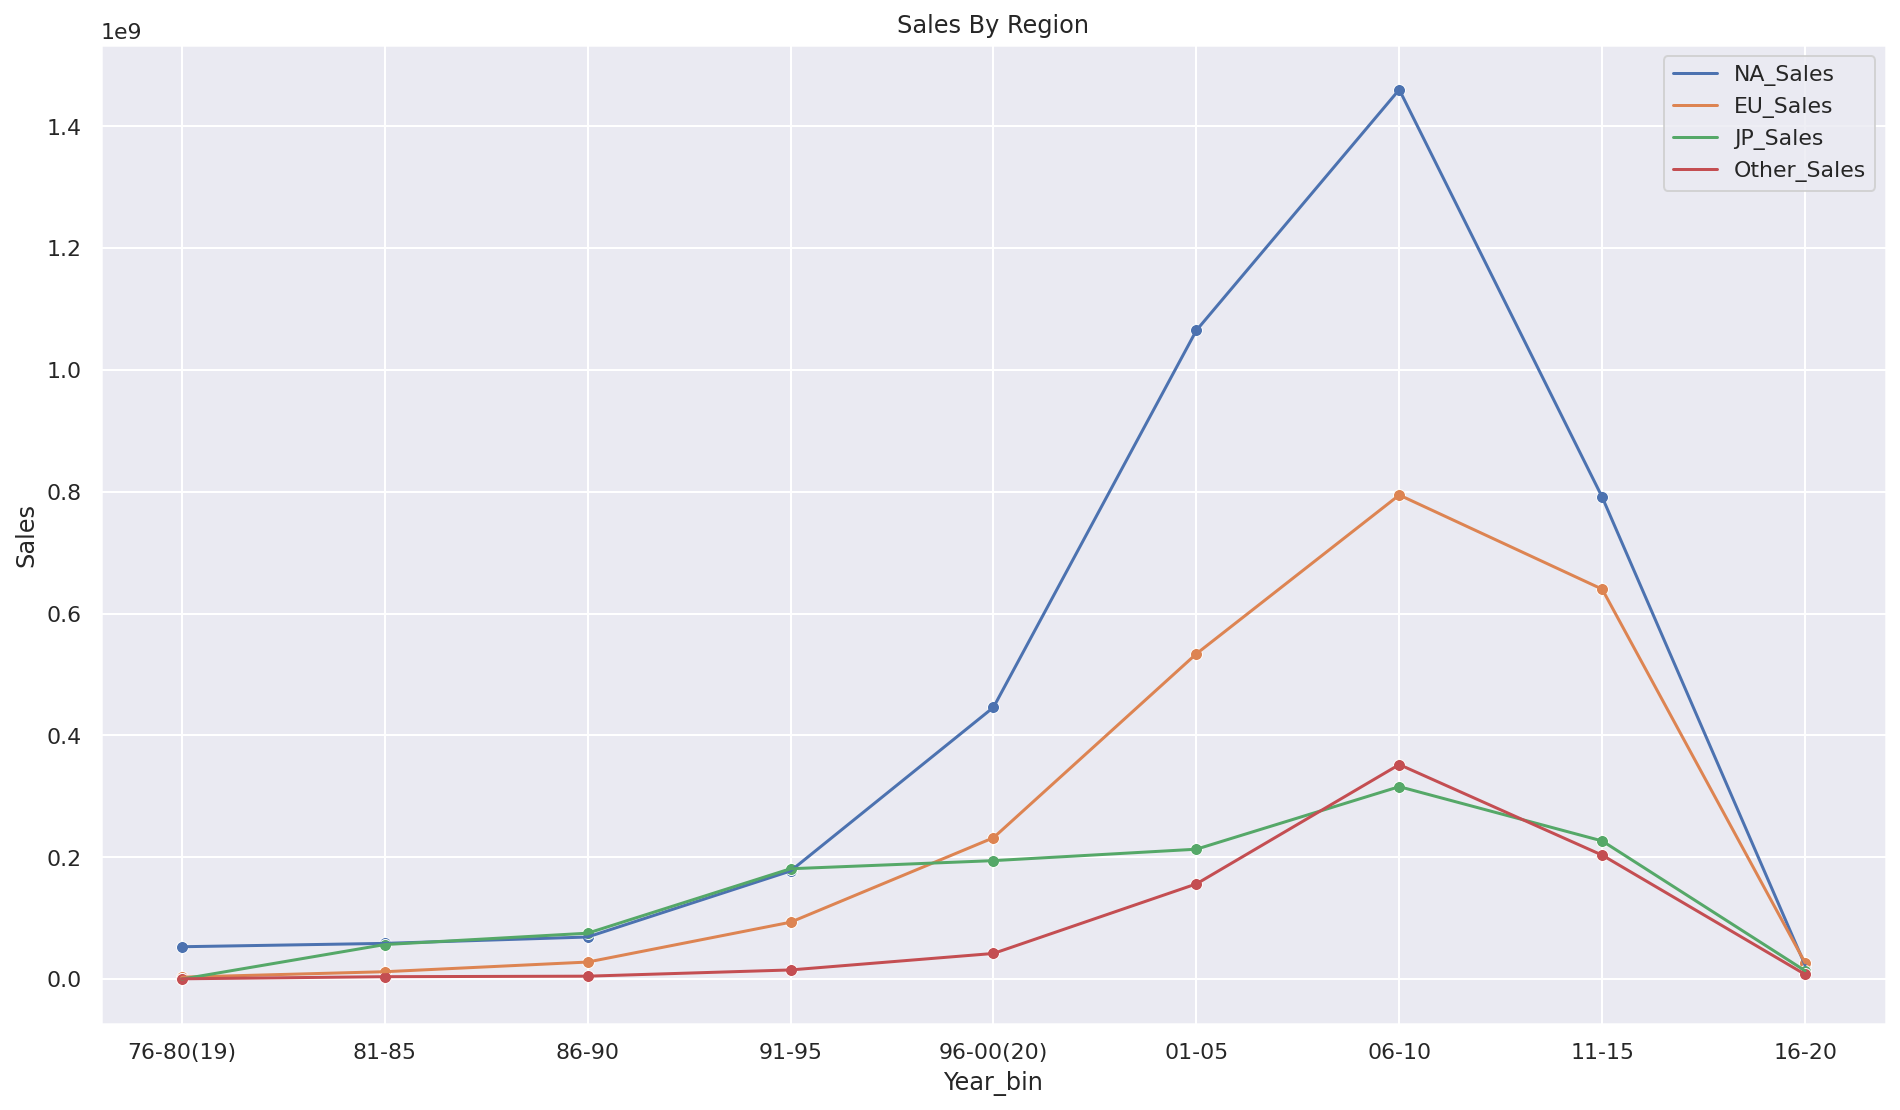

In [71]:
plt.figure(figsize = (16,9))
for i in range(4):
  sns.lineplot(x = d1.index, y = Sales_list[i], data = d1)
  sns.scatterplot(x = d1.index, y = Sales_list[i], data = d1)
plt.legend(Sales_list)
plt.ylabel('Sales')
plt.title('Sales By Region')
#sns.lineplot(x = d1.index, y = 'JP_Sales', data = d1)

In [72]:
#연도별 평균

d2 = df2.groupby(['Year_bin', 'Genre'])[['Tot_Sales']].sum().reset_index()

In [73]:
d2

,Year_bin,Genre,Tot_Sales
0,76-80(19),Action,17860000
1,76-80(19),Adventure,1300000
2,76-80(19),Fighting,770000
3,76-80(19),Misc,2700000
4,76-80(19),Platform,6920000
...,...,...,...
103,16-20,Role-Playing,6790000
104,16-20,Shooter,18229999
105,16-20,Simulation,680000
106,16-20,Sports,14630000


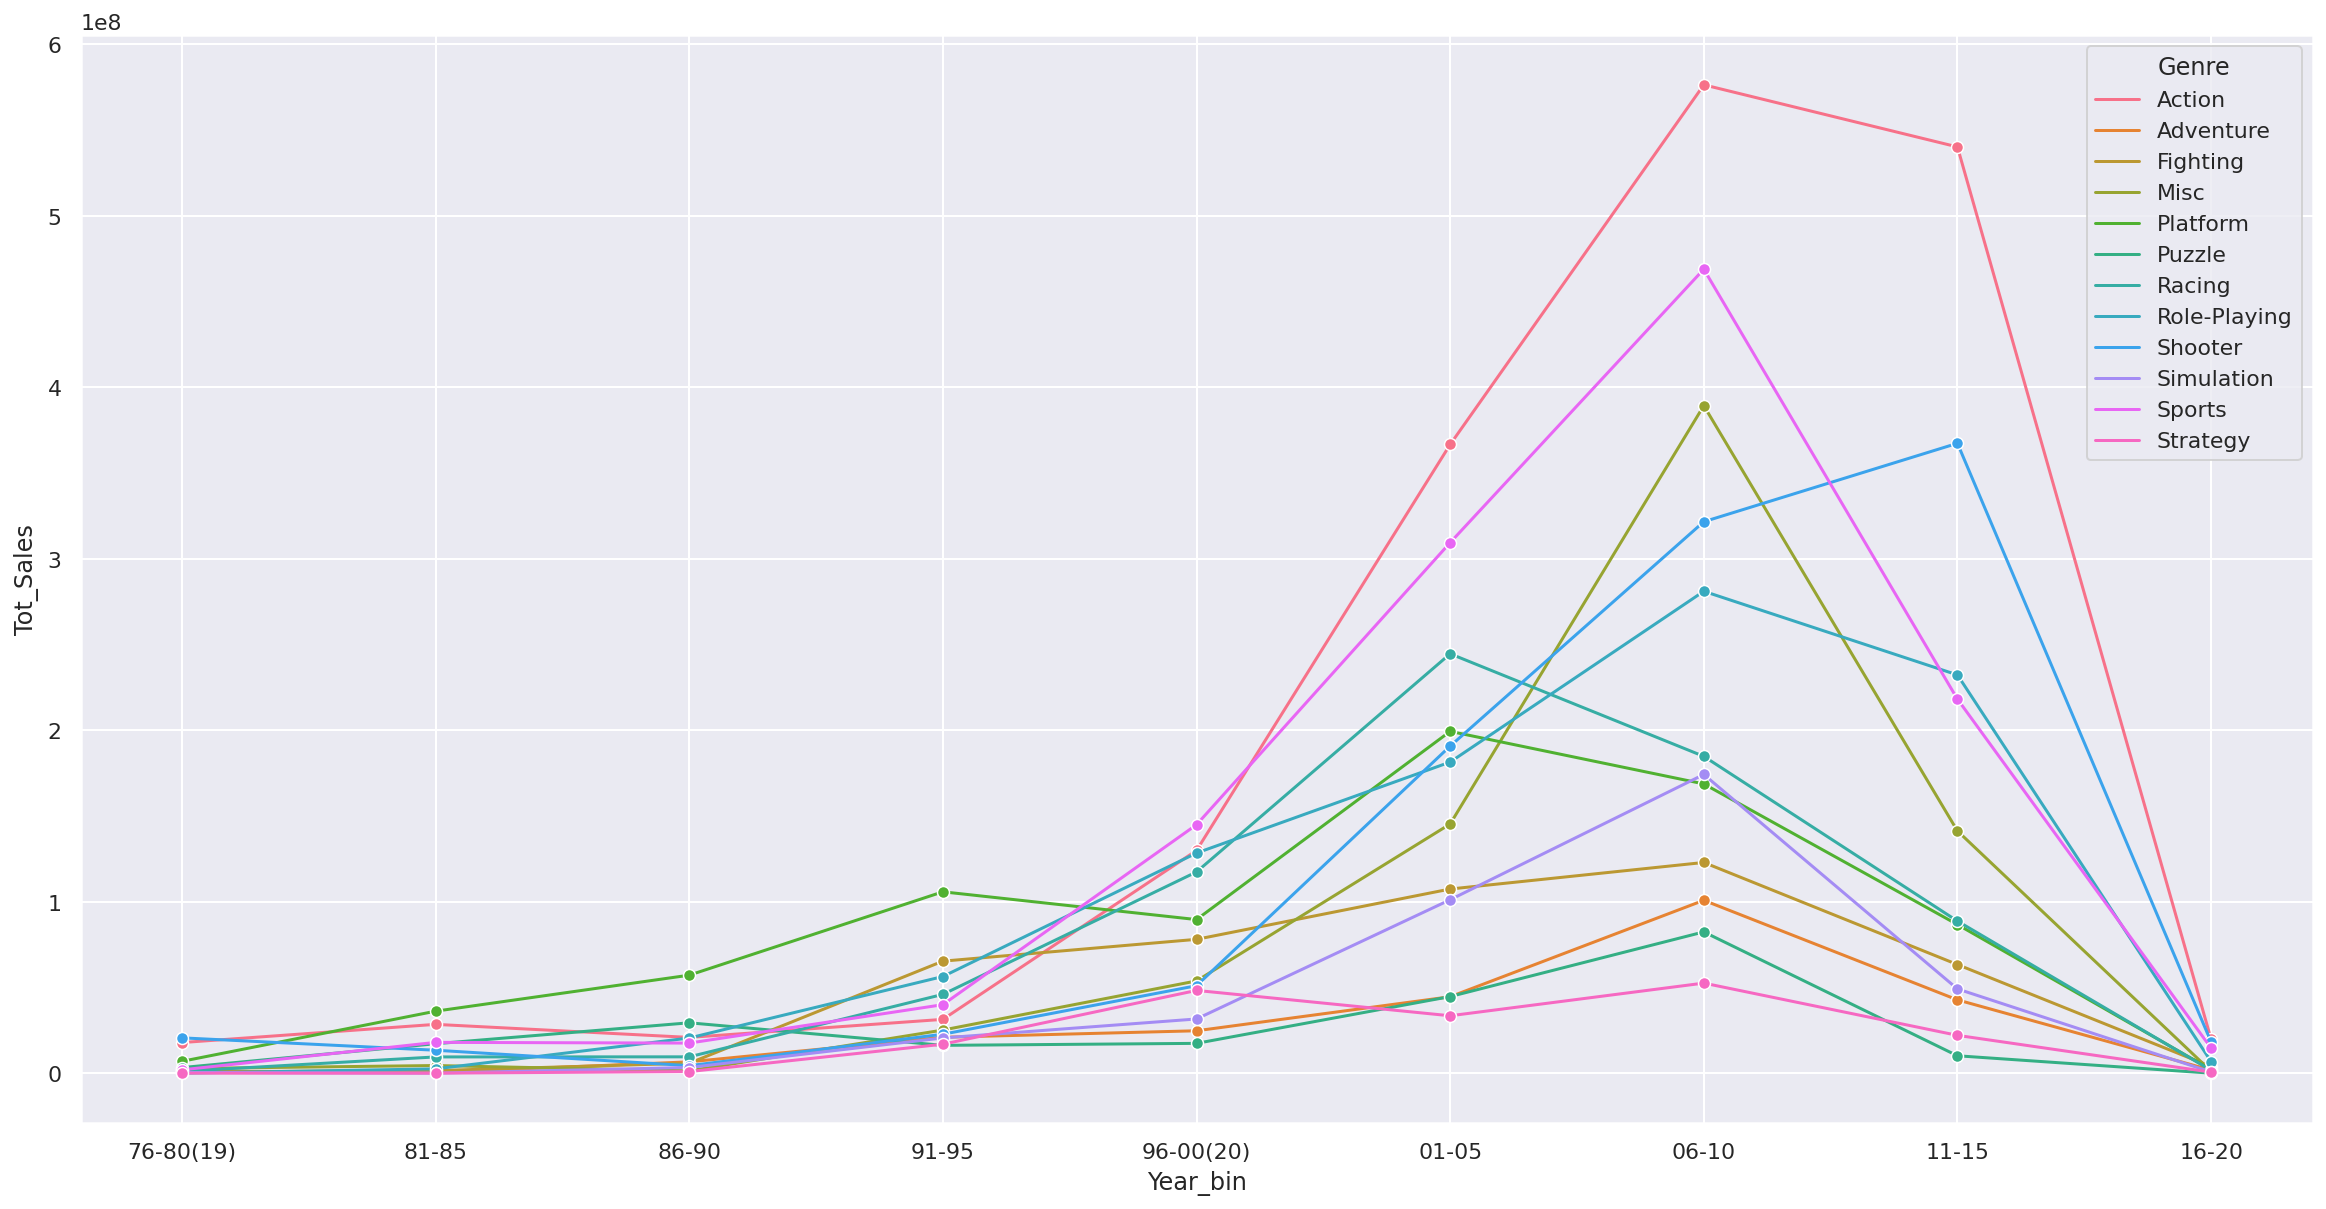

In [74]:
sns.lineplot(x = 'Year_bin', y = 'Tot_Sales', data = d2, hue = 'Genre', marker = 'o')

In [75]:

Sales_list

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

In [76]:
all_list = [Sales_list].append('Tot_Sales')

In [77]:
all_list = list(Sales_list)
all_list.append('Tot_Sales')

In [78]:
d2 = df2.groupby(['Year_bin', 'Genre'])[all_list].sum().reset_index()
d2

,Year_bin,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales
0,76-80(19),Action,16740000,990000,0,130000,17860000
1,76-80(19),Adventure,1210000,80000,0,10000,1300000
2,76-80(19),Fighting,720000,40000,0,10000,770000
3,76-80(19),Misc,2530000,150000,0,20000,2700000
4,76-80(19),Platform,6470000,370000,0,80000,6920000
...,...,...,...,...,...,...,...
103,16-20,Role-Playing,1390000,1290000,3670000,440000,6790000
104,16-20,Shooter,7490000,7709999,610000,2420000,18229999
105,16-20,Simulation,270000,90000,300000,20000,680000
106,16-20,Sports,4570000,7360000,780000,1920000,14630000


In [79]:
filter = (df2['Genre'].isin(['Action', 'Role-Playing', 'Shooter'])) & (df2['Year_bin'].isin(['01-05', '06-10', '11-15', '16-20']))
gen_3 = df2[filter]

In [80]:
gen_3.shape

(5424, 15)

In [81]:
gen_3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score,Year_bin
2353,Legaia 2: Duel Saga,PS2,2001,Role-Playing,Eidos Interactive,130000,100000,0,30000,260000,1,1,1,1,01-05
2356,Rune: Viking Warlord,PS2,2001,Action,Take-Two Interactive,130000,100000,0,30000,260000,1,1,1,1,01-05
2358,Vampire Night,PS2,2001,Shooter,Sony Computer Entertainment,70000,50000,0,20000,140000,1,1,1,1,01-05
2369,Syphon Filter 3,PS,2001,Shooter,Sony Computer Entertainment,290000,200000,0,30000,520000,1,1,1,1,01-05
2373,Aidyn Chronicles: The First Mage,N64,2001,Role-Playing,THQ,80000,20000,0,0,100000,1,1,1,1,01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,Deus Ex: Mankind Divided,PS4,2016,Role-Playing,Square Enix,100000,180000,0,50000,330000,1,1,1,1,16-20
16558,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,10000,0,10000,1,1,1,1,16-20
16559,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10000,0,10000,1,1,1,1,16-20
16560,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,30000,0,30000,1,1,1,1,16-20


In [82]:
gen_3['Year_bin'].unique()

['01-05', '06-10', '11-15', '16-20']
Categories (9, object): ['76-80(19)' < '81-85' < '86-90' < '91-95' ... '01-05' < '06-10' < '11-15' < '16-20']

In [83]:
a = gen_3.groupby(['Year_bin','Platform'])['Tot_Sales'].count().reset_index()

In [84]:
a

,Year_bin,Platform,Tot_Sales
0,76-80(19),3DS,0
1,76-80(19),DC,0
2,76-80(19),DS,0
3,76-80(19),GB,0
4,76-80(19),GBA,0
...,...,...,...
175,16-20,Wii,0
176,16-20,WiiU,6
177,16-20,X360,4
178,16-20,XB,1


In [85]:
df01_05 = a[a['Year_bin'] == '01-05']
df06_10 = a[a['Year_bin'] == '06-10']
df11_15 = a[a['Year_bin'] == '11-15']
df16_20 = a[a['Year_bin'] == '16-20']

In [86]:
df11_15['Tot_Sales']

140    254
141      0
142     64
143      0
144      0
145      0
146      0
147    174
148      0
149      1
150    368
151    139
152    142
153    191
154      0
155     67
156     73
157    254
158      0
159     84
Name: Tot_Sales, dtype: int64

In [87]:
df11_15[['Platform', 'Tot_Sales']]

,Platform,Tot_Sales
140,3DS,254
141,DC,0
142,DS,64
143,GB,0
144,GBA,0
145,GC,0
146,N64,0
147,PC,174
148,PS,0
149,PS2,1


In [88]:
np.arange(len(df11_15))*0 +0.1

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Text(0.5, 1.0, '2001~2005 Platform share(%)')

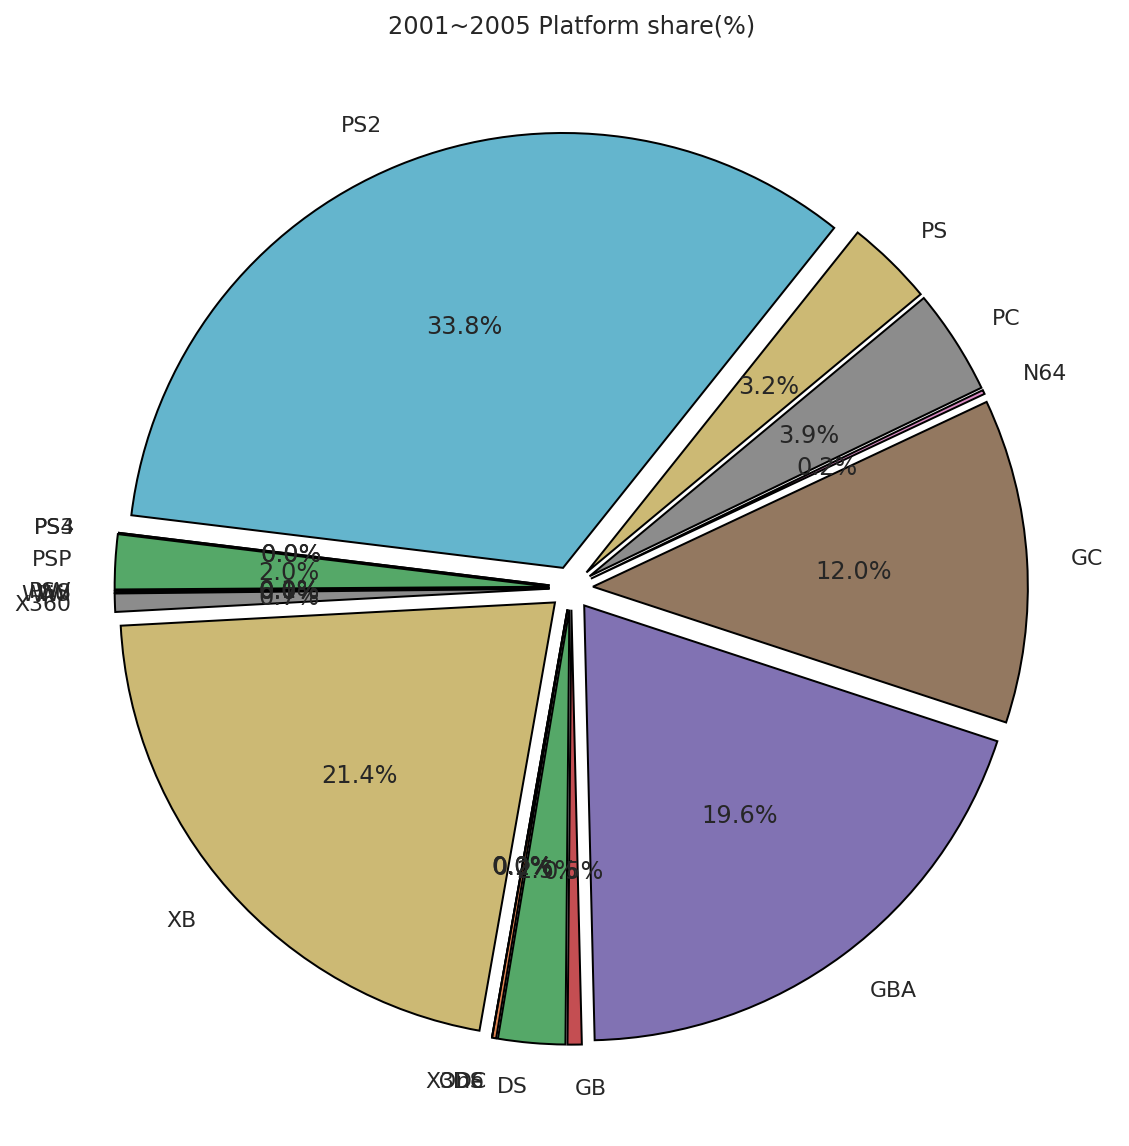

In [89]:
plt.pie(data = df01_05, x = 'Tot_Sales', autopct='%.1f%%', startangle=260,labels = 'Platform', explode = np.arange(len(df01_05))*0 +.05 ,wedgeprops={'edgecolor':'black'});
plt.title('2001~2005 Platform share(%)')

In [90]:
df01_05

,Year_bin,Platform,Tot_Sales
100,01-05,3DS,0
101,01-05,DC,2
102,01-05,DS,33
103,01-05,GB,7
104,01-05,GBA,260
105,01-05,GC,160
106,01-05,N64,2
107,01-05,PC,52
108,01-05,PS,43
109,01-05,PS2,449


Text(0.5, 1.0, '2006~2010 Platform share(%)')

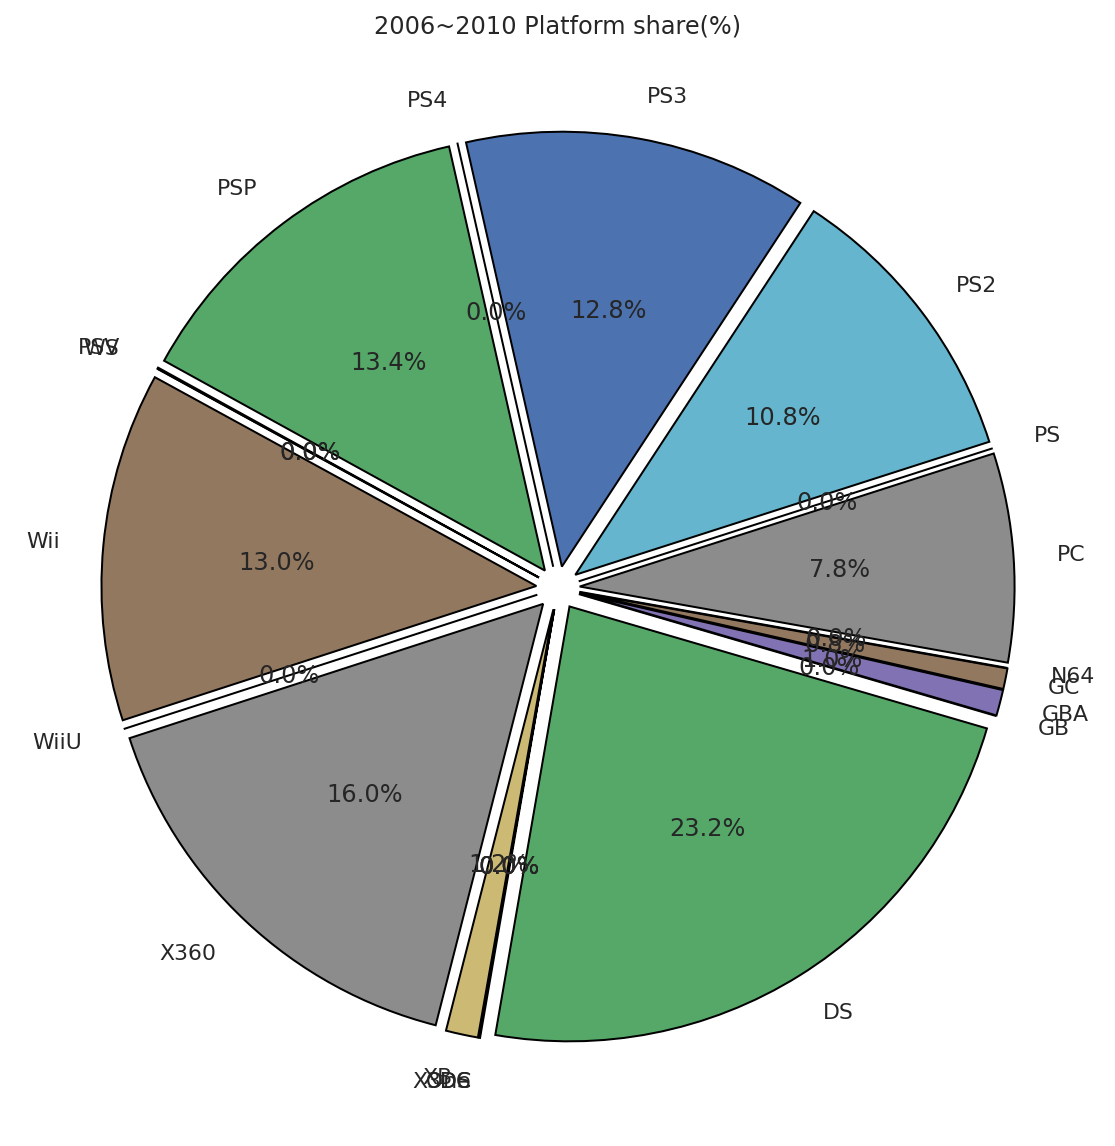

In [91]:
plt.pie(data = df06_10, x = 'Tot_Sales', autopct='%.1f%%', startangle=260,labels = 'Platform', explode = np.arange(len(df06_10))*0 +.05 ,wedgeprops={'edgecolor':'black'});
plt.title('2006~2010 Platform share(%)')

Text(0.5, 1.0, '2011~2015 Platform share(%)')

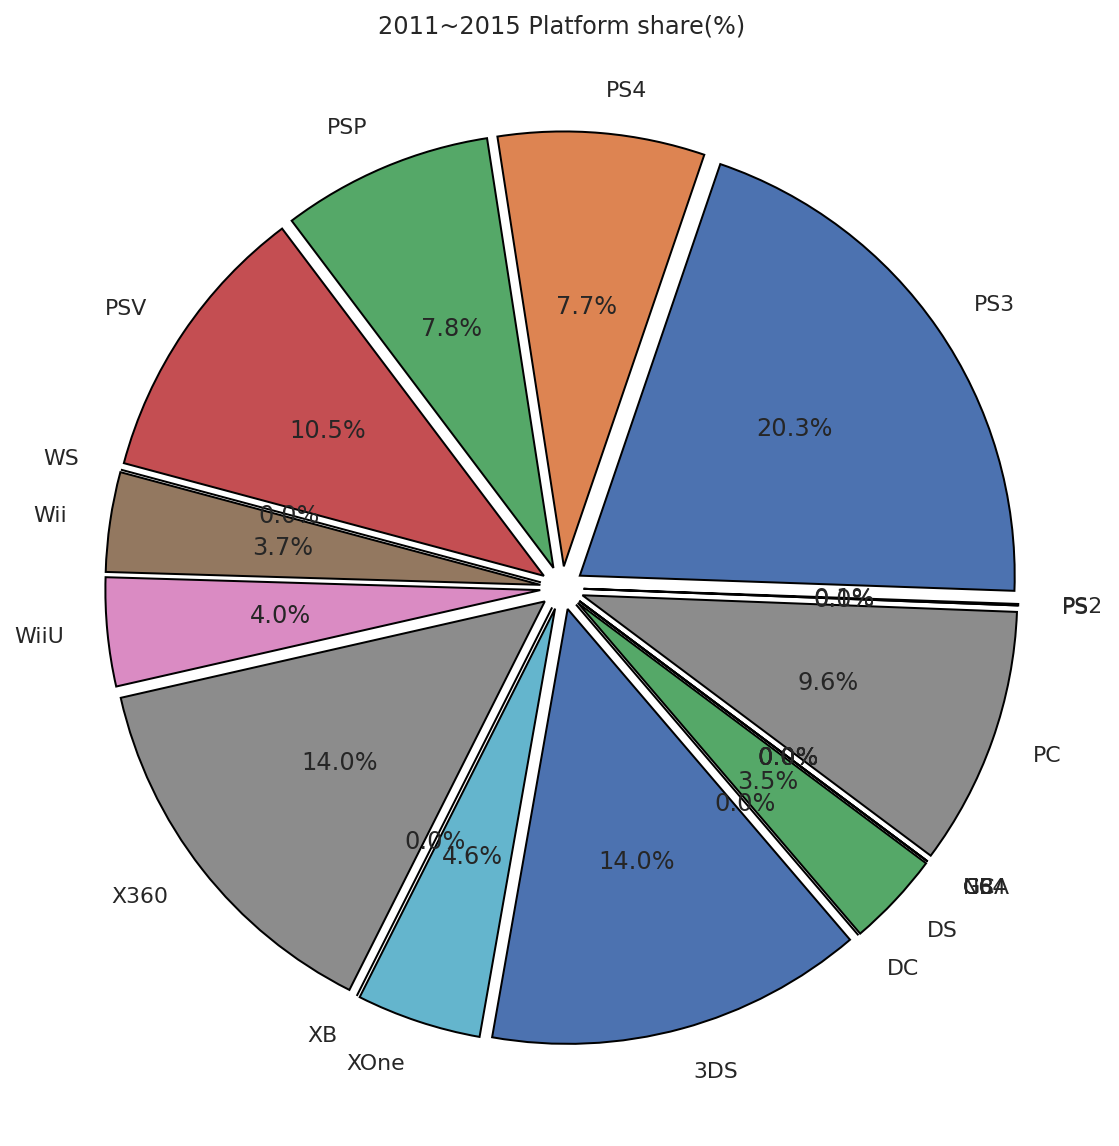

In [92]:
plt.pie(data = df11_15, x = 'Tot_Sales', autopct='%.1f%%', startangle=260,labels = 'Platform', explode = np.arange(len(df11_15))*0 +.05 ,wedgeprops={'edgecolor':'black'});
plt.title('2011~2015 Platform share(%)')

Text(0.5, 1.0, '2016~2020 Platform share(%)')

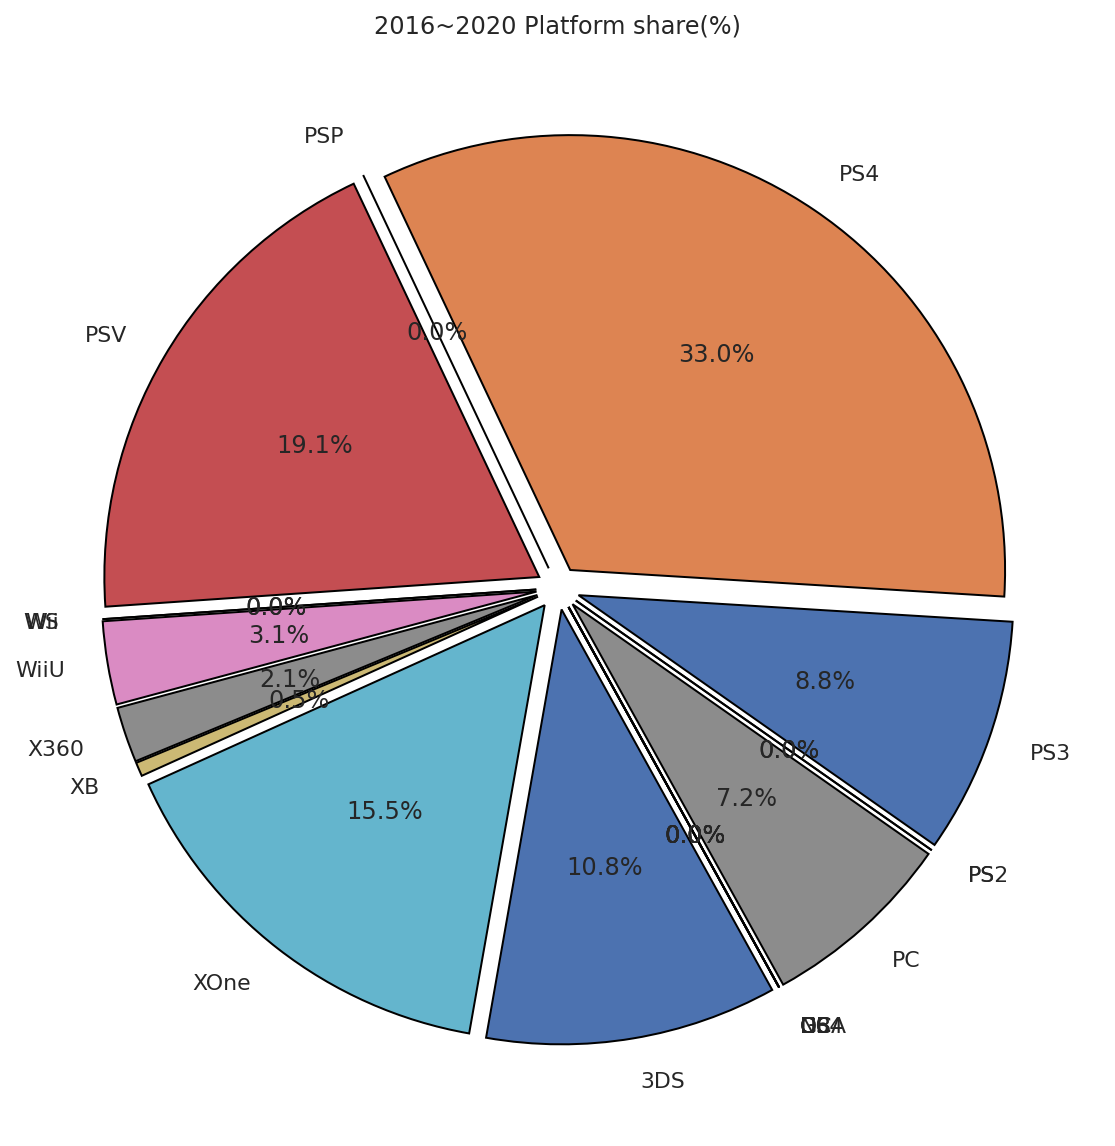

In [93]:
plt.pie(data = df16_20, x = 'Tot_Sales', autopct='%.1f%%', startangle=260,labels = 'Platform', explode = np.arange(len(df11_15))*0 +.05 ,wedgeprops={'edgecolor':'black'});
plt.title('2016~2020 Platform share(%)')

In [94]:
gen_3.groupby('Year_bin')['Platform'].count()

Year_bin
76-80(19)       0
81-85           0
86-90           0
91-95           0
96-00(20)       0
01-05        1329
06-10        2090
11-15        1811
16-20         194
Name: Platform, dtype: int64

In [95]:
gen_3['Platform'].value_counts() #PS2 XB 대상에서 제외

PS2     676
PS3     652
X360    602
DS      582
PSP     450
PC      402
Wii     338
XB      310
GBA     280
3DS     275
PSV     229
PS4     203
GC      176
XOne    114
WiiU     79
PS       43
GB        7
DC        3
N64       2
WS        1
Name: Platform, dtype: int64

In [96]:
df2[df2['Tot_Sales'] == df2['Tot_Sales'].max()] # 모든지역 가장 높은 출고량의 게임

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score,Year_bin
5596,Mario Kart DS,DS,2005,Racing,Nintendo,9810000,7570000,4130000,1920000,23430000,5,5,3,2,01-05


In [97]:
rank10_df = df2.sort_values(by = 'Tot_Sales', ascending = False).head(10)

In [98]:
bar_df = round(rank10_df.set_index('Name').iloc[:,4:8] / pow(10,6),2) # top10 game 시각화 활용 10^6으로 나눔..

<Figure size 1152x648 with 0 Axes>

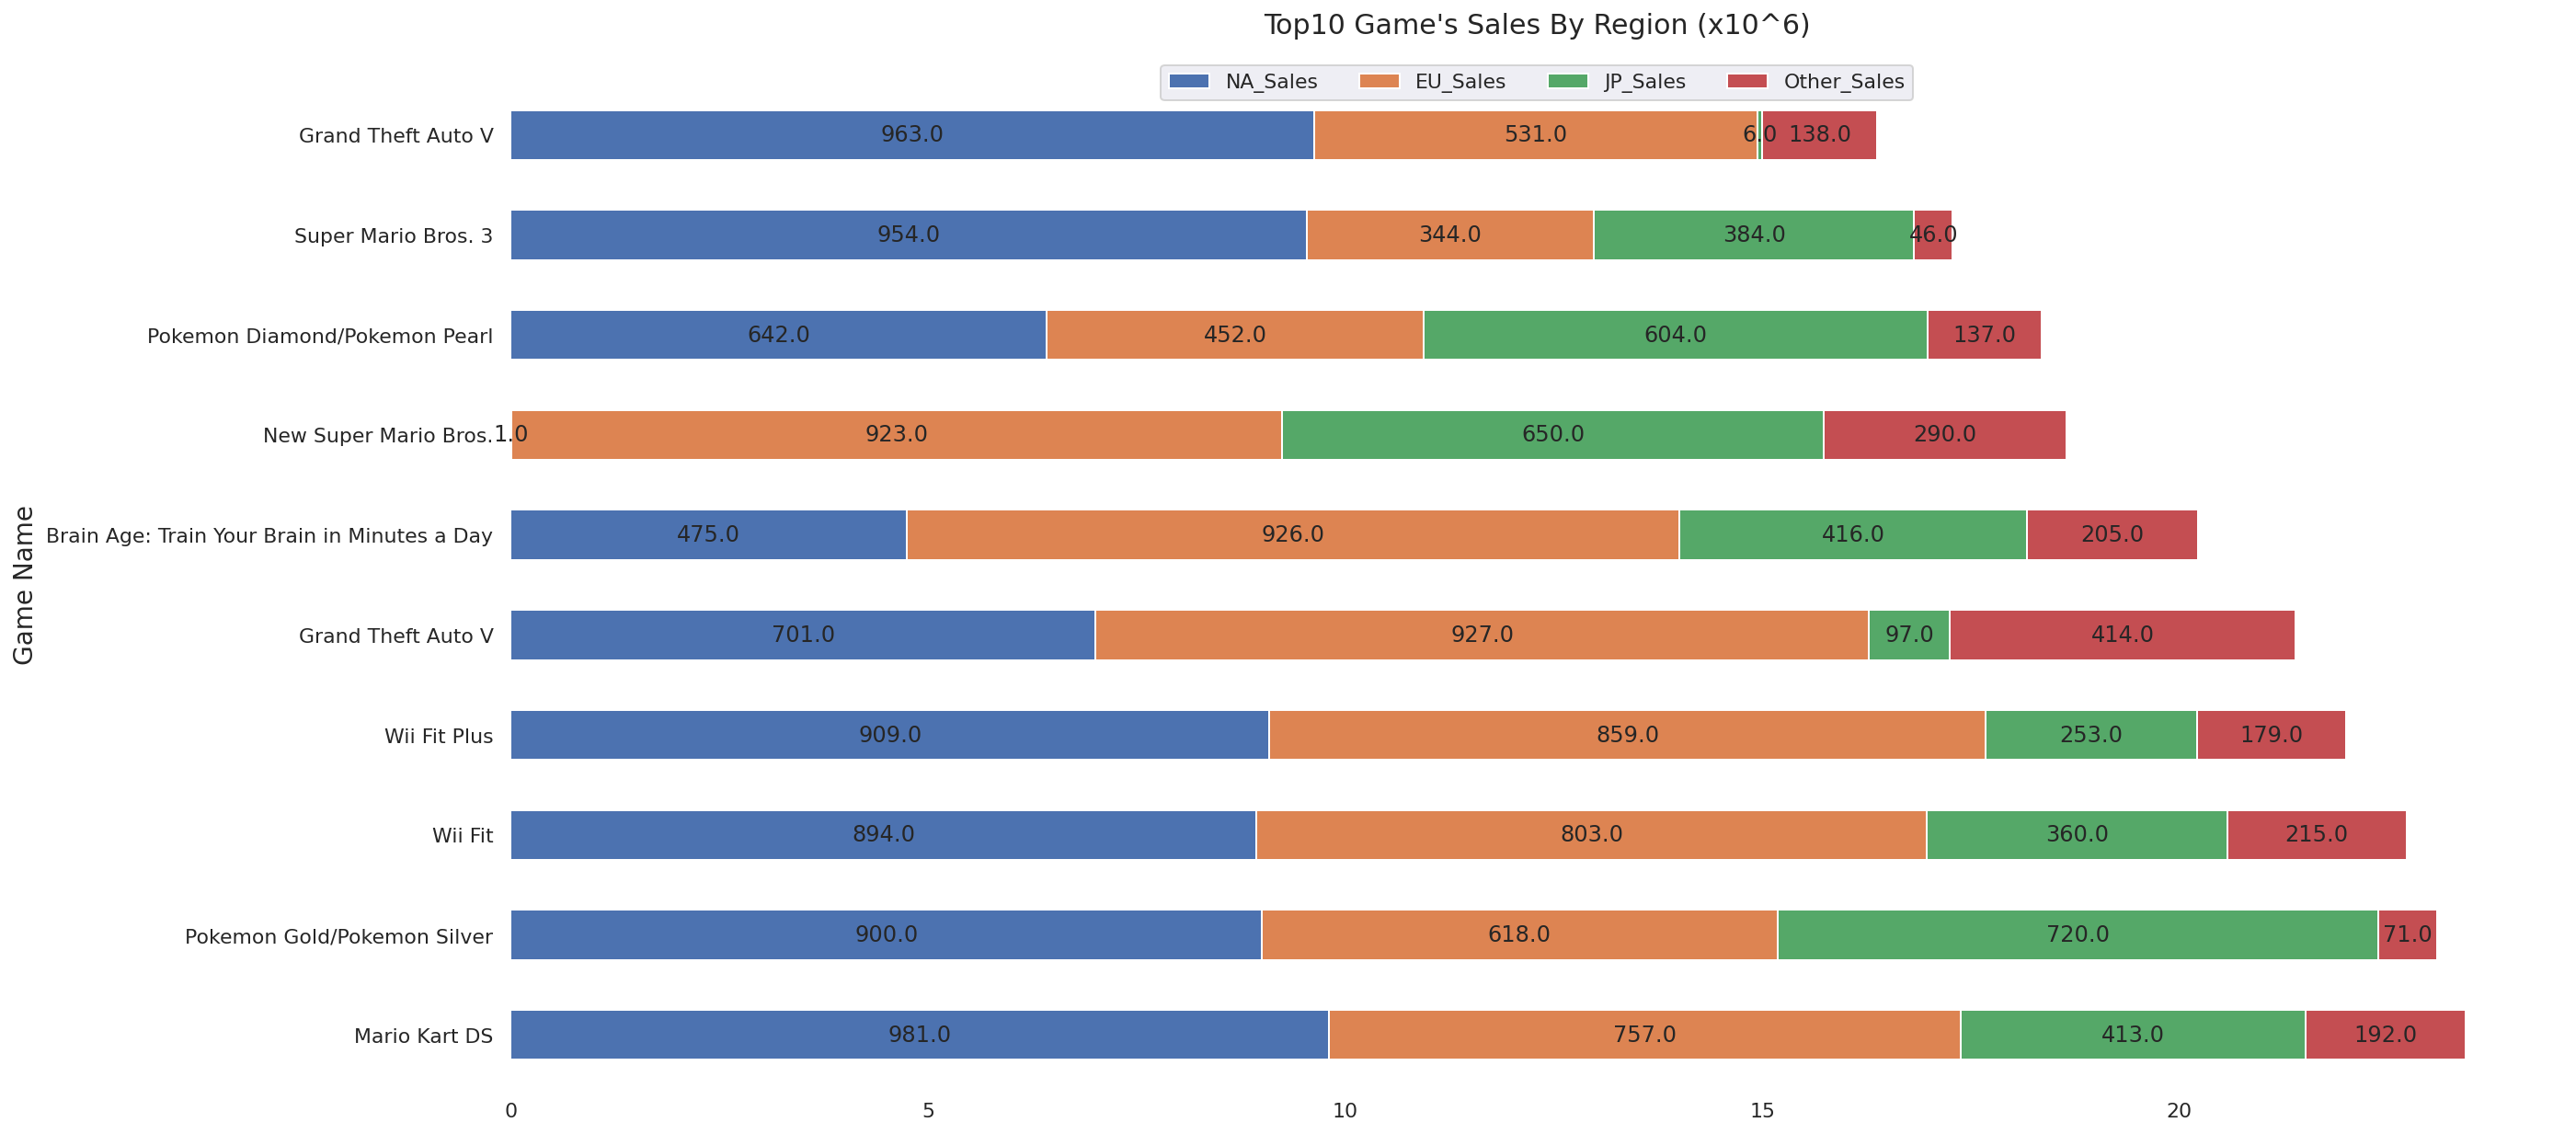

In [99]:
plt.figure(figsize = (16,9))
ax = bar_df.plot(kind='barh', stacked=True, title="Top10 Game's Sales By Region (x10^6)", rot=0,)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)
plt.legend(loc = 9, ncol = 4,bbox_to_anchor=(0.5, 1.03)) #'upper center'
plt.title(position = (.5, 1.04), label = "Top10 Game's Sales By Region (x10^6)", fontsize = 15)
plt.ylabel('Game Name',fontsize = 14)
plt.show()

In [100]:
dd = (rank10_df.groupby('Publisher').size())

Text(0.5, 1.0, 'Genre of Top10 Games')

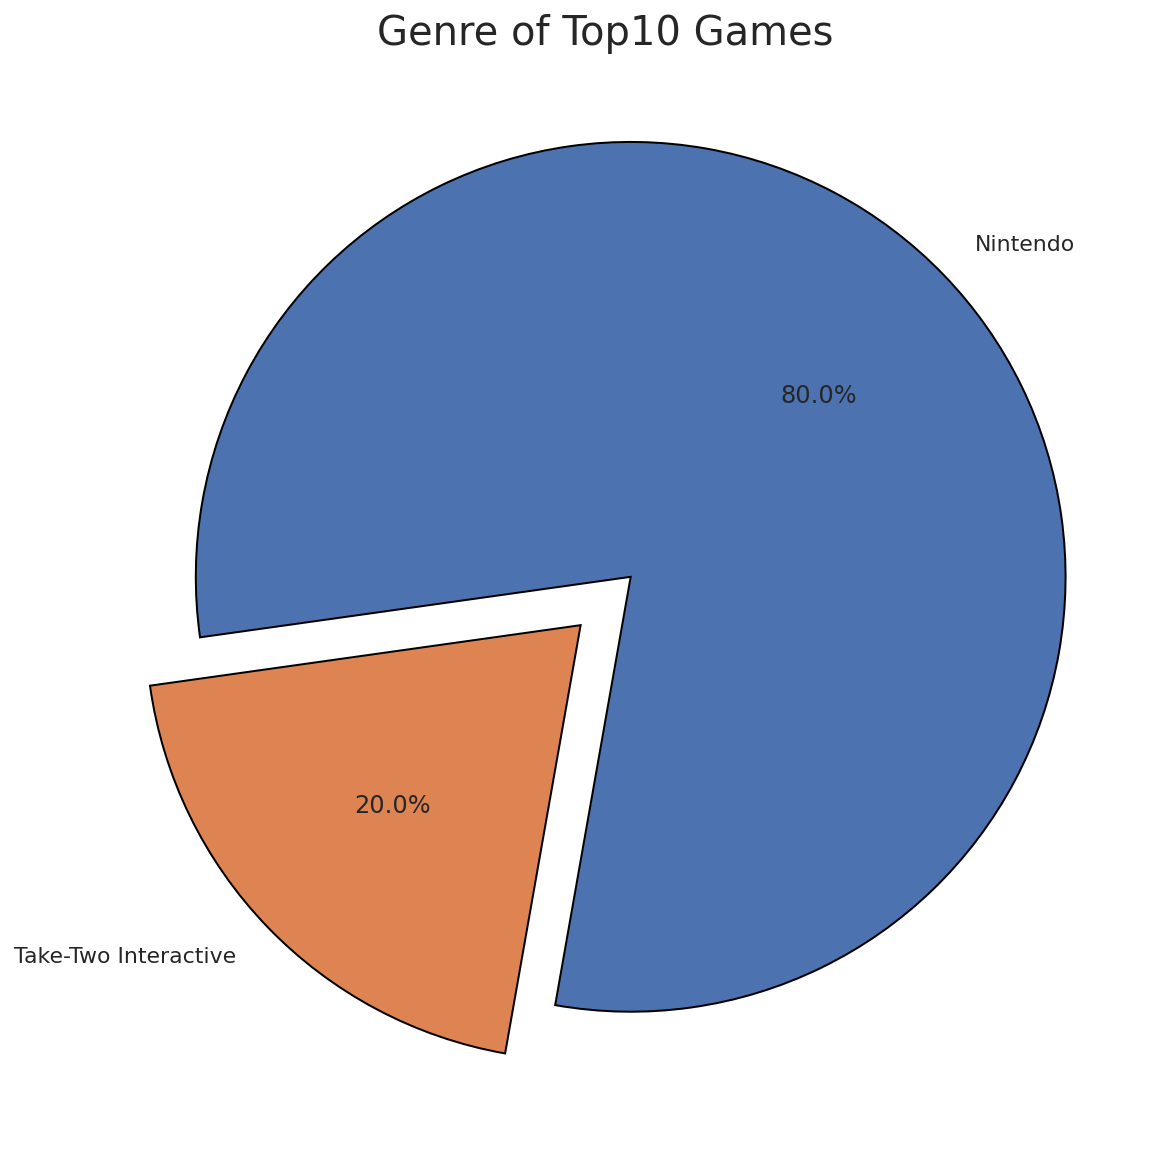

In [101]:
plt.pie( x = dd.values, autopct='%.1f%%', startangle=260, labels = dd.index, explode = [.08, .08] ,wedgeprops={'edgecolor':'black'});
plt.title('Genre of Top10 Games', fontsize = 20) 


In [102]:
rank10_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score,Year_bin
5596,Mario Kart DS,DS,2005,Racing,Nintendo,9810000,7570000,4130000,1920000,23430000,5,5,3,2,01-05
1984,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9000000,6180000,7200000,710000,23090000,5,4,5,1,96-00(20)
8391,Wii Fit,Wii,2007,Sports,Nintendo,8940000,8029999,3600000,2150000,22719999,5,5,3,2,06-10
9894,Wii Fit Plus,Wii,2009,Sports,Nintendo,9090000,8590000,2530000,1790000,22000000,5,5,2,2,06-10
14843,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999,4,5,1,3,11-15
5297,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4750000,9260000,4160000,2049999,20219999,3,5,3,2,01-05
6287,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380,9230000,6500000,2900000,18641380,1,5,5,2,06-10
6765,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6420000,4520000,6040000,1370000,18350000,4,3,5,1,06-10
191,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9540000,3440000,3840000,460000,17280000,5,2,3,1,86-90
14844,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000,5,3,1,1,11-15


In [103]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score,Year_bin
0,Indy 500,2600,1977,Racing,Atari,260000,10000,0,0,270000,1,1,1,1,76-80(19)
1,Combat,2600,1977,Action,Atari,1170000,70000,0,10000,1250000,1,1,1,1,76-80(19)
2,Air-Sea Battle,2600,1977,Shooter,Atari,910000,60000,0,10000,980000,1,1,1,1,76-80(19)
3,Space Invaders,2600,1978,Shooter,Atari,2360000,140000,0,30000,2530000,2,1,1,1,76-80(19)
4,Maze Craze: A Game of Cops 'n Robbers,2600,1978,Action,Atari,420000,20000,0,0,440000,1,1,1,1,76-80(19)


In [104]:
df2['Tot_Sales'].sum()

8573096810

In [105]:
rank10_df = rank10_df.reset_index(drop = True)

In [106]:
sum10 = rank10_df.loc[0:10,'Tot_Sales'] / df2['Tot_Sales'].sum() * 100

In [107]:
sum10.sum()

2.373720739542191

In [108]:

df2[df2['Publisher']=='Unknown']#.values == 'Unkwown'#_counts()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Tot_Sales,NA_Sales_score,EU_Sales_score,JP_Sales_score,Other_Sales_score,Year_bin
26,Fast Food,2600,1981,Action,Unknown,270000,20000,0,0,290000,1,1,1,1,76-80(19)
1603,The Game of Life,PS,1998,Misc,Unknown,460000,310000,0,50000,820000,1,1,1,1,96-00(20)
2111,WCW Backstage Assault,N64,2000,Action,Unknown,110000,30000,0,0,140000,1,1,1,1,96-00(20)
2304,Majesty 2: The Fantasy Kingdom Sim,X360,2000,Simulation,Unknown,30000,0,0,0,30000,1,1,1,1,96-00(20)
2498,Rayman Arena,XB,2001,Racing,Unknown,50000,10000,0,0,60000,1,1,1,1,01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16062,War for the Overworld,PC,2015,Strategy,Unknown,0,10000,0,0,10000,1,1,1,1,11-15
16318,Ao no Kanata no Four Rhythm,PSV,2016,Adventure,Unknown,0,0,30000,0,30000,1,1,1,1,16-20
16346,Persona 5,PS3,2016,Role-Playing,Unknown,0,0,100000,0,100000,1,1,1,1,16-20
16505,Sengoku Otome: Legend Battle,PSV,2016,Action,Unknown,0,0,20000,0,20000,1,1,1,1,16-20


In [109]:
action_df = df2[(df2['Genre'].isin(['Action'])) & (df2['Year_bin'].isin(['11-15', '16-20']))] #11~20 Action 필터링

Text(0.5, 1.0, '2011 ~ 2017 Action Game Sales By Region')

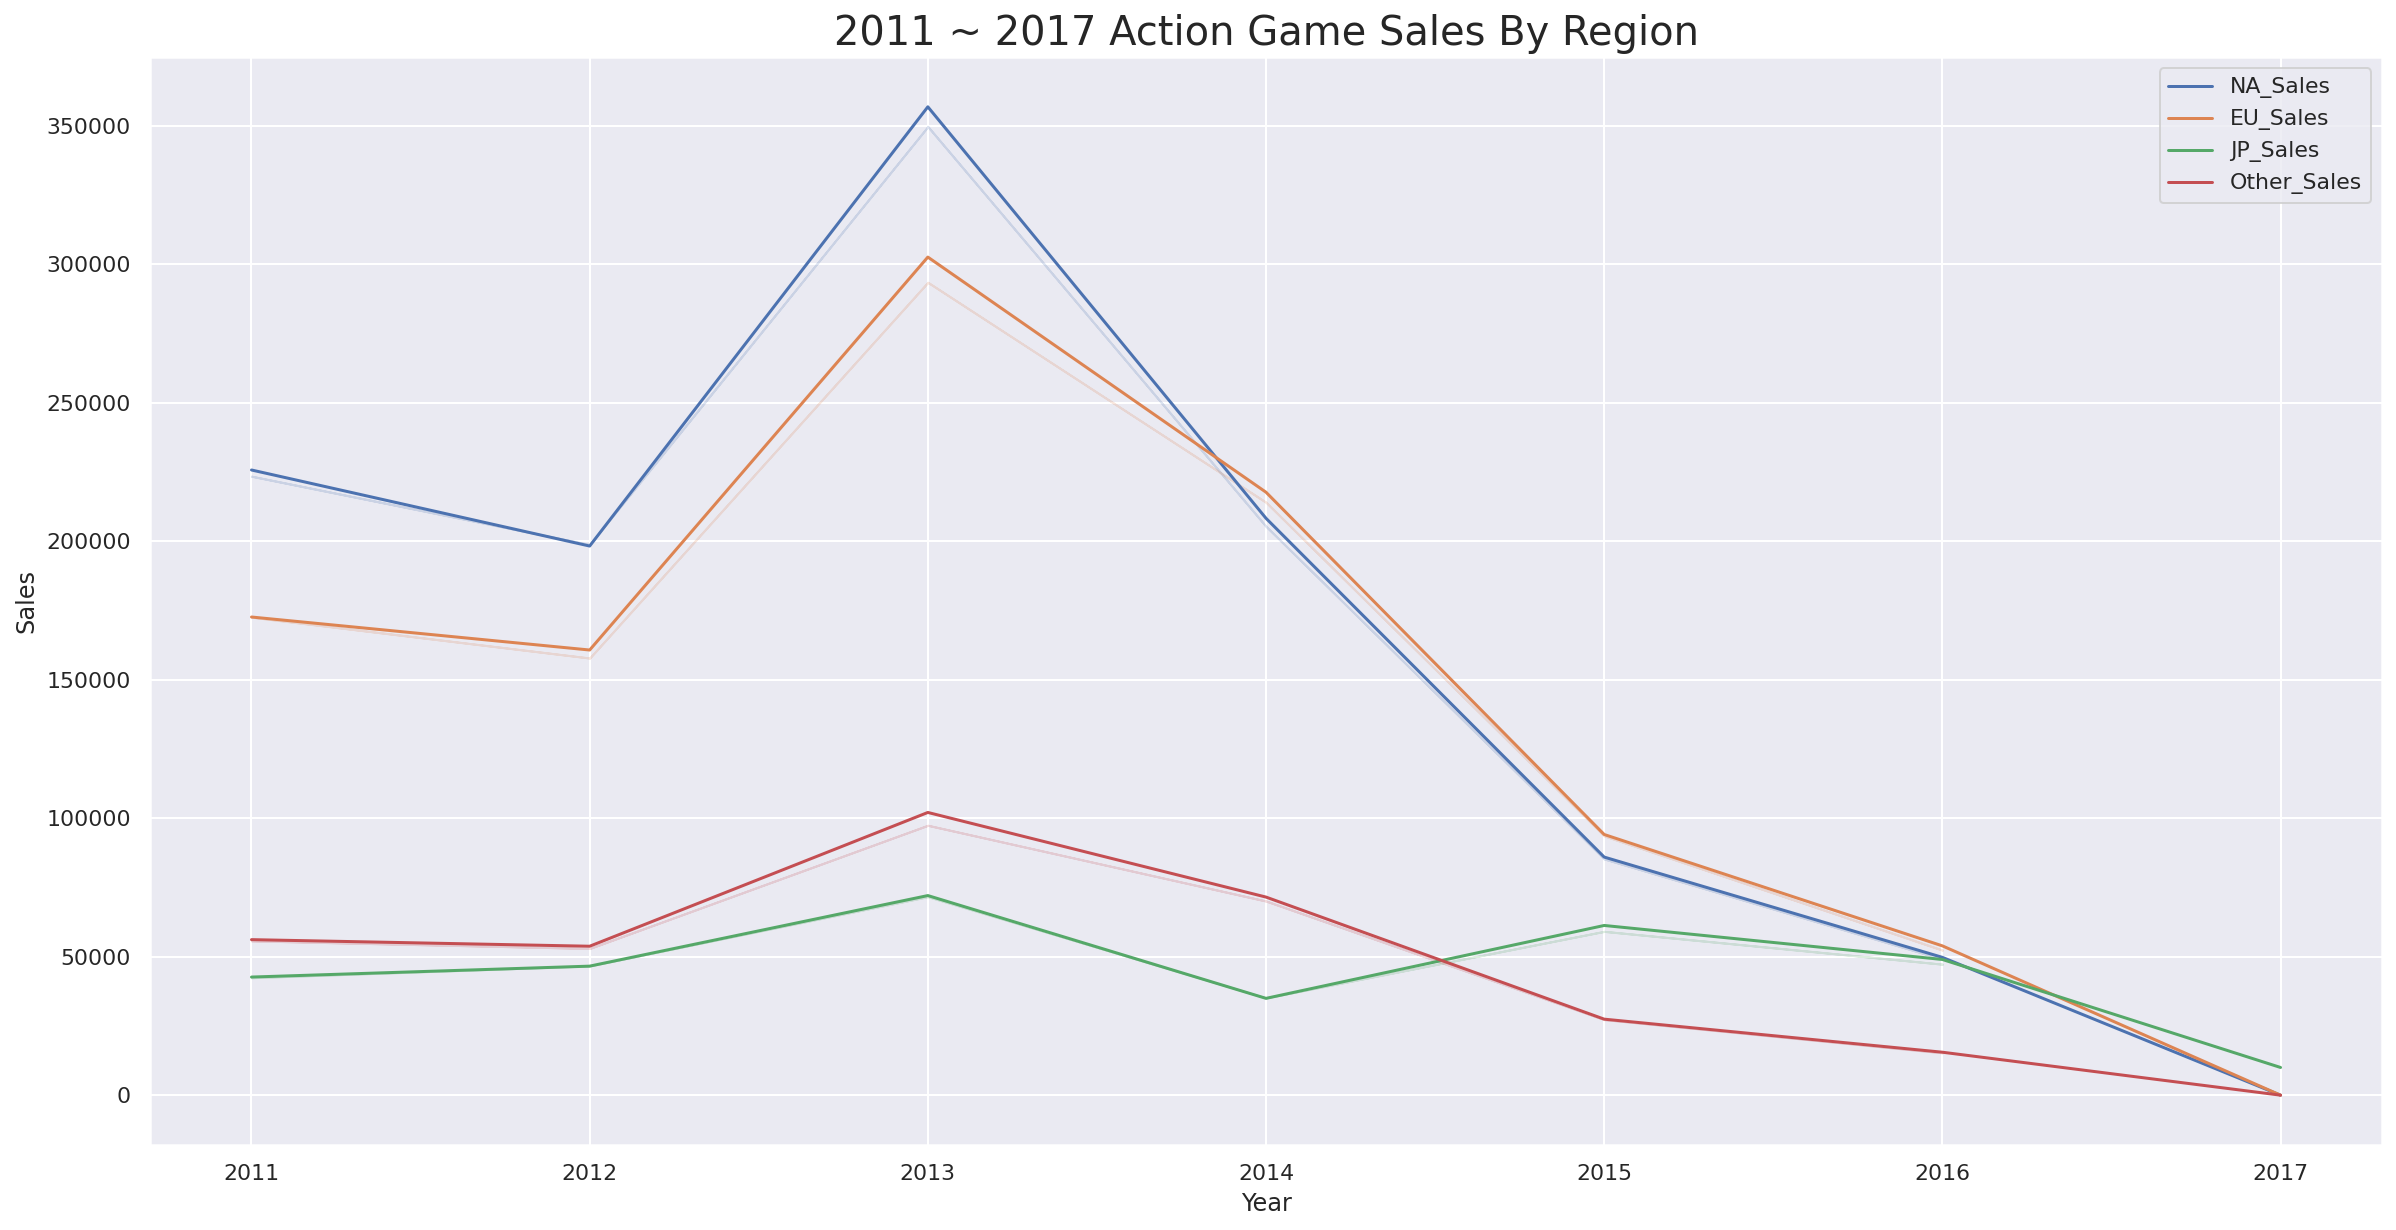

In [110]:

for i in range(4):
  sns.lineplot(x = 'Year', y = Sales_list[i], data = action_df, markers='o', ci=False)
  #sns.scatterplot(x = d1.index, y = Sales_list[i], data = d1)
plt.legend(Sales_list)
plt.ylabel('Sales')
plt.title('2011 ~ 2017 Action Game Sales By Region', fontsize = 20)
#sns.lineplot(x = d1.index, y = 'JP_Sales', data = d1)